# 1 Load Libraries and Datasets
## 1.1 Load Libraries

In [2]:
import numpy as np
import pandas as pd
import gc
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib

## 1.2 Load Datasets

If u have already run 1.2 and 1.3 before, just directly jump to 2.

In [4]:
train_transaction = pd.read_csv('input/train_transaction.csv')
train_identity = pd.read_csv('input/train_identity.csv')

test_transaction = pd.read_csv('input/test_transaction.csv')
test_identity = pd.read_csv('input/test_identity.csv')

Reduce memory since the datasets would take a lot

In [5]:
## Function to reduce the DF size
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [6]:
## Reducing memory of train sets
train_transaction = reduce_mem_usage(train_transaction)
train_identity = reduce_mem_usage(train_identity)

Mem. usage decreased to 542.35 Mb (69.4% reduction)
Mem. usage decreased to 25.86 Mb (42.7% reduction)


In [7]:
## Reducing memory of test sets
test_transaction = reduce_mem_usage(test_transaction)
test_identity = reduce_mem_usage(test_identity)

Mem. usage decreased to 472.59 Mb (68.9% reduction)
Mem. usage decreased to 25.44 Mb (42.7% reduction)


## 1.3 Preparing Data

merge *train_transaction* and *train_identity*, *test_transaction* and *test_identity*
### 1.3.1 Left Join

In [8]:
train_left_join = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test_left_join = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

In [9]:
train_left_join.shape

(590540, 434)

<AxesSubplot:title={'center':'missing rate of columns after left join'}>

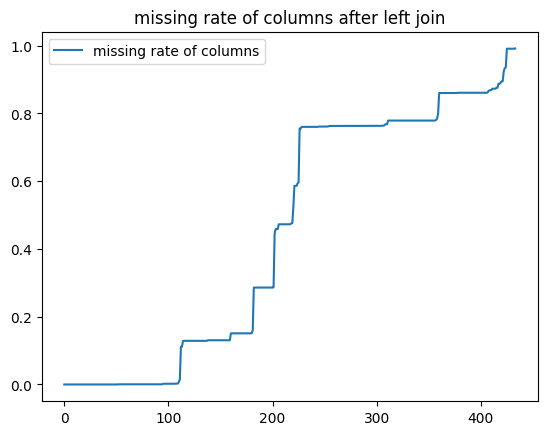

In [97]:
# missing rate of left join
miss_rate_left = train_left_join.isnull().mean().sort_values()
miss_rate_l = pd.DataFrame(miss_rate_left).reset_index(drop=False)
miss_rate_l.columns=['features','missing rate of columns']
miss_rate_l.plot(title = 'missing rate of columns after left join',kind='line')

<AxesSubplot:title={'center':'missing rate of rows after left join'}>

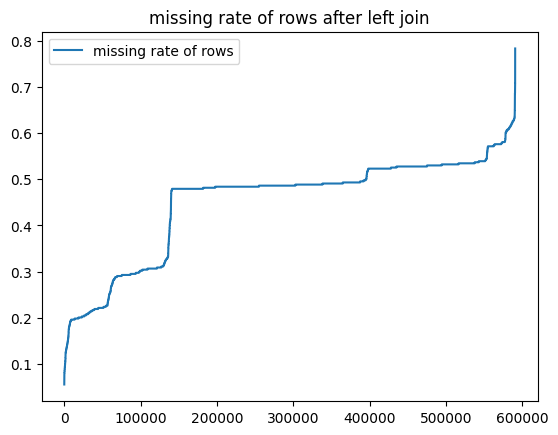

In [98]:
miss_rate_left_rows = train_left_join.isnull().sum(axis = 1).sort_values() / train_left_join.shape[1]
miss_rate_l_r = pd.DataFrame(miss_rate_left_rows).reset_index(drop=False)
miss_rate_l_r.columns=['rows','missing rate of rows']
miss_rate_l_r.plot(title = 'missing rate of rows after left join', y='missing rate of rows', kind='line')


### 1.3.2 Inner Join

In [12]:
train_in_join = pd.merge(train_transaction, train_identity, on='TransactionID', how='inner')
# test_in_join = pd.merge(test_transaction, test_identity, on='TransactionID', how='inner')

In [101]:
test_in_join = pd.merge(test_transaction, test_identity, on='TransactionID', how='inner')

<AxesSubplot:title={'center':'missing rate of columns after inner join'}>

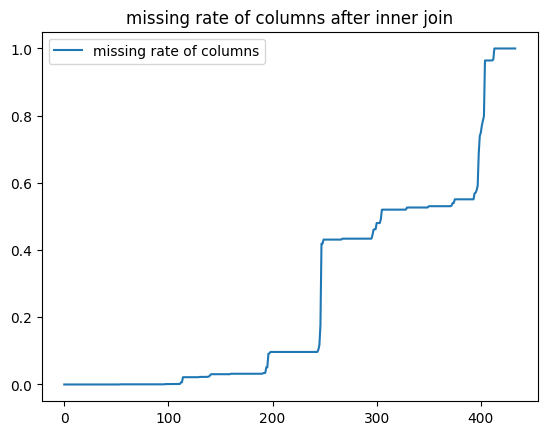

In [107]:
# missing rate of left join
miss_rate_in = train_in_join.isnull().sum().sort_values(ascending=True) / train_in_join.shape[0]
miss_rate_i = pd.DataFrame(miss_rate_in).reset_index(drop=False)
miss_rate_i.columns=['features','missing rate of columns']
miss_rate_i.plot(title = 'missing rate of columns after inner join', kind='line')

<AxesSubplot:title={'center':'missing rate of rows after inner join'}>

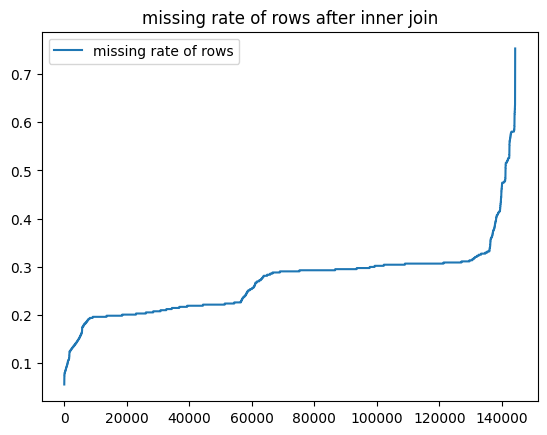

In [99]:
miss_rate_in_rows = train_in_join.isnull().sum(axis = 1).sort_values() / train_in_join.shape[1]
miss_rate_i_r = pd.DataFrame(miss_rate_in_rows).reset_index(drop=False)
miss_rate_i_r.columns=['rows','missing rate of rows']
miss_rate_i_r.plot(title = 'missing rate of rows after inner join', y='missing rate of rows', kind='line')

output the new csv files

In [10]:
train_left_join.to_csv('data/train_left_join.csv')
test_left_join.to_csv('data/test_left_join.csv')

In [11]:
del train_transaction, train_identity, test_transaction, test_identity
gc.collect()

0

In [12]:
train = train_left_join
test = test_left_join

# 2 Descriptive Statistics

## 2.1 View Datasets

- load datasets

In [3]:
# If you have run 1.1 and 1.2, you don't need to run this cell
train = pd.read_csv('data/train_left_join.csv')
test = pd.read_csv('data/test_left_join.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/train_left_join.csv'

- train

In [111]:
pd.set_option('display.max_columns', None)
pd.DataFrame(train)

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
0             2987004        0          86506         50.0000         H   
1             2987008        0          86535         15.0000         H   
2             2987010        0          86549         75.8750         C   
3             2987011        0          86555         16.5000         C   
4             2987016        0          86620         30.0000         H   
...               ...      ...            ...             ...       ...   
144228        3577521        0       15810802         48.8750         C   
144229        3577526        1       15810876        250.0000         R   
144230        3577529        0       15810912         73.8125         C   
144231        3577531        0       15810935        400.0000         R   
144232        3577534        0       15811030         67.5000         C   

        card1  card2  card3       card4  card5   card6  addr1  addr2  dist1  \
0        4497  514.0  150.0  mastercard  102.0  credit  420.0   87.0    NaN   
1        2803  100.0  150.0        visa  226.0   debit  337.0   87.0    NaN   
2       16496  352.0  117.0  mastercard  134.0  credit    NaN    NaN    NaN   
3        4461  375.0  185.0  mastercard  224.0   debit    NaN    NaN    NaN   
4        1790  555.0  150.0        visa  226.0   debit  170.0   87.0    NaN   
...       ...    ...    ...         ...    ...     ...    ...    ...    ...   
144228  12019  305.0  106.0  mastercard  224.0   debit    NaN    NaN    NaN   
144229   1214  174.0  150.0        visa  226.0  credit  272.0   87.0    NaN   
144230   5096  555.0  185.0  mastercard  137.0  credit    NaN    NaN    NaN   
144231   6019  583.0  150.0        visa  226.0  credit  337.0   87.0    NaN   
144232   5812  408.0  185.0  mastercard  224.0   debit    NaN    NaN    NaN   

         dist2  P_emaildomain  R_emaildomain   C1   C2   C3   C4   C5   C6  \
0          NaN      gmail.com            NaN  1.0  1.0  0.0  0.0  0.0  1.0   
1          NaN  anonymous.com            NaN  1.0  1.0  0.0  0.0  0.0  1.0   
2          NaN      gmail.com      gmail.com  1.0  4.0  0.0  1.0  0.0  1.0   
3         30.0    hotmail.com    hotmail.com  1.0  1.0  0.0  1.0  0.0  1.0   
4          NaN        aol.com            NaN  1.0  1.0  0.0  0.0  0.0  1.0   
...        ...            ...            ...  ...  ...  ...  ...  ...  ...   
144228     0.0       yahoo.fr       yahoo.fr  1.0  9.0  0.0  1.0  0.0  1.0   
144229     NaN      gmail.com      gmail.com  1.0  1.0  0.0  1.0  0.0  1.0   
144230     NaN      gmail.com      gmail.com  1.0  1.0  0.0  1.0  0.0  1.0   
144231  2296.0      gmail.com  anonymous.com  2.0  3.0  0.0  4.0  0.0  3.0   
144232     NaN      gmail.com      gmail.com  1.0  1.0  0.0  1.0  0.0  1.0   

         C7   C8   C9  C10  C11  C12  C13  C14   D1   D2   D3   D4   D5   D6  \
0       0.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  0.0  NaN  NaN  NaN  NaN  NaN   
1       0.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  0.0  NaN  NaN  NaN  NaN  NaN   
2       1.0  1.0  0.0  1.0  2.0  2.0  2.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
3       1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  NaN  NaN  0.0  NaN  0.0   
4       0.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  0.0  NaN  NaN  NaN  NaN  NaN   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
144228  1.0  2.0  0.0  2.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
144229  0.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  NaN  NaN  NaN  NaN  NaN  NaN   
144230  1.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  NaN  NaN  0.0  NaN  0.0   
144231  0.0  3.0  0.0  3.0  2.0  0.0  4.0  2.0  NaN  NaN  NaN  NaN  NaN  NaN   
144232  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  NaN  NaN  0.0  NaN  0.0   

         D7          D8        D9  D10  D11  D12  D13    D14  D15   M1   M2  \
0       NaN         NaN       NaN  NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN   
1       NaN         NaN       NaN  NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN   
2       0.0   83.000000

- test

In [112]:
pd.DataFrame(test)

TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
0             3663586       18404013        6.269531         C  15885  545.0   
1             3663588       18404055       50.000000         S   2453  399.0   
2             3663597       18404235       37.312500         C  15885  545.0   
3             3663601       18404315        6.269531         C  15885  545.0   
4             3663602       18404359       52.250000         C   9633  130.0   
...               ...            ...             ...       ...    ...    ...   
141902        4170230       34214253       10.453125         C   5812  408.0   
141903        4170233       34214271       13.406250         C   3154  408.0   
141904        4170234       34214277       50.000000         H   9002  453.0   
141905        4170236       34214287       12.171875         C   3154  408.0   
141906        4170239       34214345       24.343750         C   5713  168.0   

        card3             card4  card5   card6  addr1  addr2  dist1  dist2  \
0       185.0              visa  138.0   debit    NaN    NaN    NaN    NaN   
1       150.0  american express  137.0  credit  494.0   87.0    NaN   37.0   
2       185.0              visa  138.0   debit    NaN    NaN    NaN    NaN   
3       185.0              visa  138.0   debit    NaN    NaN    NaN    NaN   
4       185.0              visa  138.0   debit    NaN    NaN    NaN    NaN   
...       ...               ...    ...     ...    ...    ...    ...    ...   
141902  185.0        mastercard  224.0   debit    NaN    NaN    NaN    NaN   
141903  185.0        mastercard  224.0   debit    NaN    NaN    NaN    7.0   
141904  150.0              visa  226.0   debit  433.0   87.0    NaN    NaN   
141905  185.0        mastercard  224.0   debit    NaN    NaN    NaN  157.0   
141906  144.0              visa  147.0  credit    NaN    NaN    NaN    NaN   

        P_emaildomain  R_emaildomain   C1    C2   C3   C4   C5   C6   C7  \
0         hotmail.com    hotmail.com  1.0   1.0  0.0  1.0  0.0  1.0  1.0   
1                 NaN      gmail.com  4.0   8.0  0.0  4.0  0.0  0.0  0.0   
2       anonymous.com  anonymous.com  1.0   1.0  0.0  1.0  0.0  1.0  1.0   
3         hotmail.com    hotmail.com  2.0   4.0  0.0  3.0  0.0  3.0  3.0   
4         hotmail.com    hotmail.com  8.0  21.0  0.0  4.0  0.0  4.0  4.0   
...               ...            ...  ...   ...  ...  ...  ...  ...  ...   
141902      gmail.com      gmail.com  1.0   1.0  0.0  1.0  0.0  1.0  1.0   
141903    hotmail.com    hotmail.com  1.0   2.0  0.0  2.0  0.0  2.0  2.0   
141904      yahoo.com      yahoo.com  1.0   1.0  0.0  1.0  0.0  1.0  0.0   
141905    hotmail.com    hotmail.com  1.0   3.0  0.0  1.0  0.0  1.0  1.0   
141906    hotmail.com    hotmail.com  1.0   1.0  0.0  1.0  0.0  1.0  1.0   

          C8   C9   C10   C11   C12   C13  C14     D1     D2    D3     D4  \
0        1.0  0.0   1.0   1.0   1.0   0.0  0.0    NaN    NaN   NaN    0.0   
1       25.0  0.0  30.0   5.0   0.0  57.0  4.0   34.0   34.0   1.0    NaN   
2        1.0  0.0   1.0   1.0   1.0   1.0  1.0    NaN    NaN   NaN    0.0   
3        3.0  0.0   3.0   3.0   3.0   2.0  1.0    NaN    NaN   0.0  567.0   
4        5.0  0.0   6.0  11.0  11.0  10.0  6.0    NaN    NaN   NaN  316.0   
...      ...  ...   ...   ...   ...   ...  ...    ...    ...   ...    ...   
141902   1.0  0.0   1.0   1.0   1.0   1.0  1.0    0.0    NaN   NaN    0.0   
141903   1.0  0.0   2.0   1.0   1.0   2.0  1.0  373.0  373.0   1.0    0.0   
141904   1.0  0.0   1.0   1.0   0.0   1.0  1.0    0.0    NaN   NaN    0.0   
141905   2.0  0.0   2.0   1.0   1.0   3.0  1.0   16.0   16.0  16.0   16.0   
141906   1.0  0.0   1.0   1.0   1.0   1.0  1.0    0.0    NaN   NaN    0.0   

           D5     D6     D7          D8        D9    D10  D11    D12    D13  \
0         NaN    0.0    NaN         NaN       NaN    0.0  NaN    0.0    0.0   
1         NaN  634.0    1.0   22.000000  0.000000  458.0  NaN    NaN    NaN   
2         NaN    0.0    NaN        

## 2.2 Shape of Datasets

In [113]:
print('train shape is {}'.format(train.shape))
print('test shape is {}'.format(test.shape))

train shape is (144233, 434)
test shape is (141907, 433)


## 2.3 Features Overview
### 2.3.1 types of features

In [114]:
# pd.set_option('display.max_rows', None)
sm = pd.DataFrame(train).dtypes

In [115]:
pd.set_option("display.precision", 1)
pd.DataFrame(train.describe())

TransactionID  isFraud  TransactionDT  TransactionAmt     card1  \
count        1.4e+05  1.4e+05        1.4e+05        144233.0  144233.0   
mean         3.2e+06  7.8e-02        6.2e+06             NaN    9879.0   
std          1.8e+05  2.7e-01        4.8e+06             NaN    5047.6   
min          3.0e+06  0.0e+00        8.7e+04             0.3    1000.0   
25%          3.1e+06  0.0e+00        1.9e+06            25.5    5713.0   
50%          3.2e+06  0.0e+00        4.9e+06            50.0    9633.0   
75%          3.4e+06  0.0e+00        1.0e+07           100.0   15063.0   
max          3.6e+06  1.0e+00        1.6e+07          1800.0   18396.0   

          card2     card3     card5    addr1    addr2  dist1    dist2  \
count  143331.0  144061.0  143277.0  83786.0  83786.0    0.0  3.8e+04   
mean        NaN       NaN       NaN      NaN      NaN    NaN      inf   
std         NaN       0.0       0.0      NaN      0.0    NaN      inf   
min       100.0     100.0     100.0    100.0     10.0    NaN  0.0e+00   
25%       264.0     150.0     138.0    204.0     87.0    NaN  7.0e+00   
50%       408.0     150.0     224.0    299.0     87.0    NaN  3.7e+01   
75%       545.0     185.0     226.0    330.0     87.0    NaN  2.1e+02   
max       600.0     231.0     237.0    540.0    102.0    NaN  1.2e+04   

             C1        C2        C3        C4        C5        C6        C7  \
count  144233.0  144233.0  144233.0  144233.0  144233.0  144233.0  144233.0   
mean        NaN       NaN       0.0       NaN       0.0       NaN       NaN   
std         NaN       NaN       0.0       NaN       0.0       NaN       NaN   
min         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
25%         1.0       1.0       0.0       1.0       0.0       1.0       0.0   
50%         1.0       1.0       0.0       1.0       0.0       1.0       0.0   
75%         2.0       2.0       0.0       1.0       0.0       1.0       1.0   
max      4684.0    5692.0      26.0    2252.0       0.0    2252.0    2256.0   

             C8        C9       C10       C11       C12       C13       C14  \
count  144233.0  144233.0  144233.0  144233.0  144233.0  144233.0  144233.0   
mean        NaN       0.0       NaN       NaN       NaN       NaN       NaN   
std         NaN       0.0       NaN       NaN       NaN       NaN       NaN   
min         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
25%         1.0       0.0       1.0       1.0       0.0       1.0       1.0   
50%         1.0       0.0       1.0       1.0       0.0       1.0       1.0   
75%         2.0       0.0       1.0       1.0       1.0       2.0       1.0   
max      3332.0       0.0    3256.0    3188.0    3188.0    2918.0    1429.0   

             D1       D2       D3       D4       D5       D6       D7  \
count  144015.0  3.1e+04  2.9e+04  6.5e+04  3.3e+04  67373.0  3.6e+04   
mean        NaN      inf      inf      inf      inf      NaN      inf   
std         NaN      inf      inf      inf      inf      NaN      inf   
min         0.0  0.0e+00  0.0e+00 -8.3e+01  0.0e+00    -83.0  0.0e+00   
25%         0.0  2.0e+00  0.0e+00  0.0e+00  0.0e+00      0.0  0.0e+00   
50%         0.0  3.7e+01  0.0e+00  0.0e+00  0.0e+00      0.0  0.0e+00   
75%         0.0  2.1e+02  1.5e+01  1.5e+01  2.1e+01     42.0  1.6e+01   
max       640.0  6.4e+02  8.2e+02  8.7e+02  8.2e+02    873.0  8.4e+02   

            D8       D9      D10  D11      D12      D13      D14      D15  \
count  74926.0  74926.0  69232.0  0.0  5.9e+04  6.2e+04  6.2e+04  68317.0   
mean       NaN      0.0      NaN  NaN      inf      inf      inf      NaN   
std        NaN      0.0      NaN  NaN      inf      inf      inf      NaN   
min        0.0      0.0      0.0  NaN -8.3e+01  0.0e+00 -1.9e+02    -83.0   
25%        1.0      0.2      0.0  NaN  0.0e+00  0.0e+00  0.0e+00      0.0   
50%       37.9      0.7      0.0  NaN  0.0e+00  0.0e+00  0.0e+00      0.0   
75%      188.0      0.8      0.0  NaN  1.2e+01  0.0e+00  2.0e

### 2.3.2 Statistical Description and Boxplots
#### 2.3.2.1 TransactionDT

In [116]:
print('type of TransactionDT is ' + str(train["TransactionDT"].dtypes))

type of TransactionDT is int32


> The *TransactionDT* feature is a timedelta from a given reference datetime (not an actual timestamp).

In [117]:
sm = pd.DataFrame(
    [
        ['count',train['TransactionDT'].count(), test['TransactionDT'].count()],
        ['min',train.TransactionDT.min(), test.TransactionDT.min()],
        ['max',train.TransactionDT.max(), test.TransactionDT.max()],
        ['range',train.TransactionDT.max() - train.TransactionDT.min(), test.TransactionDT.max() - test.TransactionDT.min()],
        ['mid-range',(train.TransactionDT.max() - train.TransactionDT.min())/2, (test.TransactionDT.max() - test.TransactionDT.min())/2],
        ['mean',train.TransactionDT.mean(), test.TransactionDT.mean()],
        ['median',train.TransactionDT.median(), test.TransactionDT.median()],
        ['std.dev',train.TransactionDT.std(), test.TransactionDT.std()],
        ['variance',train.TransactionDT.var(), test.TransactionDT.var()],
        ['mode',train.TransactionDT.mode(), test.TransactionDT.mode()],
        ['25%',train.TransactionDT.quantile(0.25), test.TransactionDT.quantile(0.25)],
        ['50%',train.TransactionDT.quantile(0.50), test.TransactionDT.quantile(0.50)],
        ['75%',train.TransactionDT.quantile(0.75), test.TransactionDT.quantile(0.75)],
        ['IQR',train.TransactionDT.quantile(0.75)-train.TransactionDT.quantile(0.25), test.TransactionDT.quantile(0.75)-test.TransactionDT.quantile(0.25)]
    ],
    columns=['property','value_of_train','value_of_test']
)
# sm['value_of_train'] = sm.value_of_train.astype(int)
# sm['value_of_test'] = sm.value_of_test.astype(int)
sm

property                                     value_of_train  \
0       count                                             144233   
1         min                                              86506   
2         max                                           15811030   
3       range                                           15724524   
4   mid-range                                          7862262.0   
5        mean                                          6166957.7   
6      median                                          4913738.0   
7     std.dev                                          4807713.8   
8    variance                                   23114111999759.0   
9        mode  0       496100
1       502834
2       594685
3...   
10        25%                                          1885289.0   
11        50%                                          4913738.0   
12        75%                                         10257945.0   
13        IQR                                          8372656.0   

                                        value_of_test  
0                                              141907  
1                                            18404013  
2                                            34214345  
3                                            15810332  
4                                           7905166.0  
5                                          28668926.0  
6                                          29996846.0  
7                                           4679276.0  
8                                    21895624226753.5  
9   0     31892217
1     32146010
2     32564666
3...  
10                                         25220442.0  
11                                         29996846.0  
12                                         32919011.0  
13                                          7698569.0

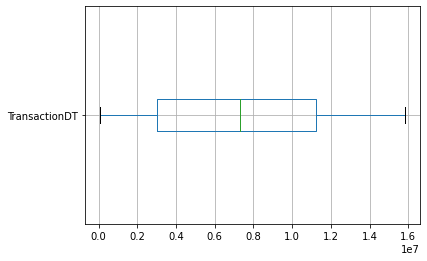

In [16]:
train[['TransactionDT']].boxplot(vert = False)
plt.show()

In [17]:
print("train: min = " + str(train.TransactionDT.min()) + ", train: max = " + str(train.TransactionDT.max()))
print("test: min = " + str(test.TransactionDT.min()) + ", test: max = " + str(test.TransactionDT.max()))

train: min = 86400, train: max = 15811131
test: min = 18403224, test: max = 34214345


In [18]:
time_span = (test.TransactionDT.max() - train.TransactionDT.min()) / 60 / 60 / 24
print("time span of the total datasets is: " + str(round(time_span)) + 'days')

time span of the total datasets is: 395days


#### 2.3.2.2 ProductCD

In [10]:
print('type of ProductCD is ' + str(train["ProductCD"].dtypes))

type of ProductCD is object


> Products in this dataset come under five broad categories: W, H, C, S, and R.

We will visualize this feature in relation with the target, *isFraud*.

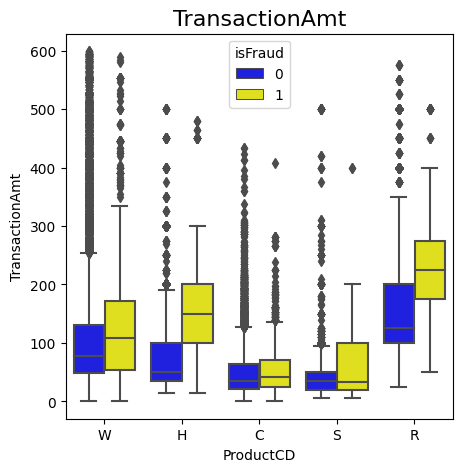

In [15]:
fig, ax = plt.subplots(figsize=(5, 5))
plot = sns.boxplot(x="ProductCD", y="TransactionAmt", hue = "isFraud", data=train.query("TransactionAmt < 600"), palette=["blue", "yellow"], ax=ax).set_title('TransactionAmt', fontsize=16)
plt.show()

For *H* and *R*, the fraudulent medium, first quartile, and third quartile of the products are higher than the fraudulent ones.

#### 2.3.2.3 TransactionAmt

In [21]:
print('type of TransactionAmt is ' + str(train["TransactionAmt"].dtypes))

type of TransactionAmt is float64


This is the amount of money transferred during the transaction, which is a continuous variable. We will visualize this feature in relation with the target - *isFraud*.

In [11]:
sm = pd.DataFrame(
    [
        ['count',train['TransactionAmt'].count()],
        ['min',train.TransactionAmt.min()],
        ['max',train.TransactionAmt.max()],
        ['range',train.TransactionAmt.max() - train.TransactionDT.min()],
        ['mid-range',(train.TransactionAmt.max() - train.TransactionAmt.min())/2],
        ['mean',train.TransactionAmt.mean()],
        ['median',train.TransactionAmt.median()],
        ['std.dev',train.TransactionAmt.std()],
        ['variance',train.TransactionAmt.var()],
        ['mode',train.TransactionAmt.mode()],
        ['25%',train.TransactionAmt.quantile(0.25)],
        ['50%',train.TransactionAmt.quantile(0.50)],
        ['75%',train.TransactionAmt.quantile(0.75)],
        ['IQR',train.TransactionAmt.quantile(0.75)-train.TransactionAmt.quantile(0.25)]
    ],
    columns=['property','value']
)
sm

property                                            value
0       count                                           129747
1         min                                            0.292
2         max                                           5096.0
3       range                                         -81304.0
4   mid-range                                         2547.854
5        mean                                       127.697251
6      median                                             75.0
7     std.dev                                       199.381311
8    variance                                     39752.907288
9        mode  0    100.0
Name: TransactionAmt, dtype: float64
10        25%                                            44.78
11        50%                                             75.0
12        75%                                            130.0
13        IQR                                            85.22

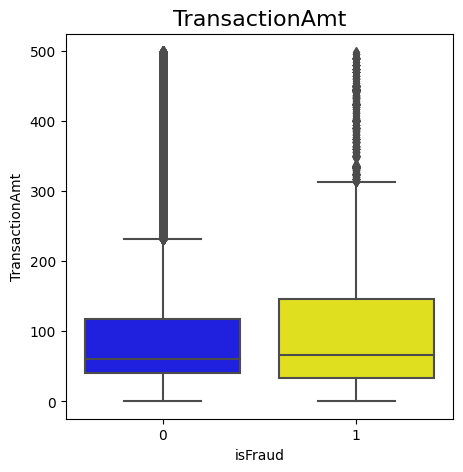

In [23]:
fig, ax = plt.subplots(figsize=(5, 5))
plot = sns.boxplot(x="isFraud", y="TransactionAmt", data=train.query("TransactionAmt < 500"), palette=["blue", "yellow"], ax=ax).set_title('TransactionAmt', fontsize=16)
plt.show()

The above box plot implies that transactions with higher prices are more likely to be fraudulent. This can be deduced from the fact that the yellow box's mean value is higher than the blue box's. The third quartile of the yellow box is significantly higher than that of the blue box, despite the first quartiles of the two distributions being very similar. This difference serves as additional proof that the higher the transaction amount, the more likely the transaction to be fraudulent.

#### 2.3.2.4 card brand (card4)

In [24]:
print('type of card4 is ' + str(train["card4"].dtypes))

type of card4 is object


The *card4* refers to the brand of the card, which are discover, mastercard, visa, and american express.

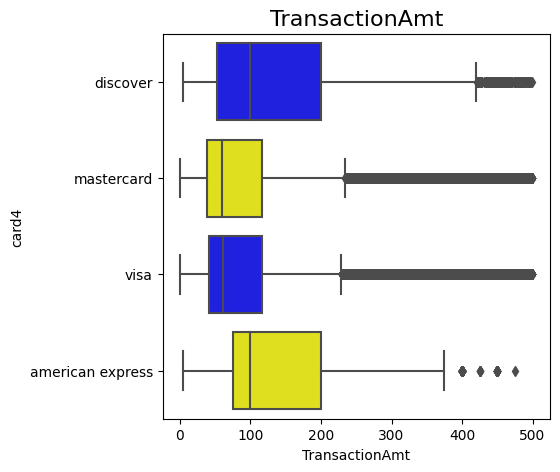

In [25]:
fig, ax = plt.subplots(figsize=(5, 5))
plot = sns.boxplot(x="TransactionAmt", y="card4", data=train.query("TransactionAmt < 500"), palette=["blue", "yellow"], ax=ax).set_title('TransactionAmt', fontsize=16)
plt.show()

The distributions for fraudulent and legitimate Mastercard and Visa cards are remarkably similar. Furthermore, it is evident from this box plot that Discover and American Express cards are frequently used for larger transaction amounts. They have far higher means than the other two card brands.

#### 2.3.2.5 Card type (card6)

In [26]:
print('type of card6 is ' + str(train["card6"].dtypes))

type of card6 is object


The *card6* refers to the btype of the card, which are credit and debit.

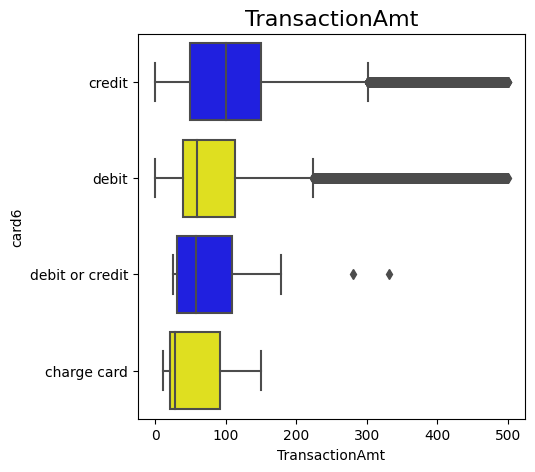

In [27]:
fig, ax = plt.subplots(figsize=(5, 5))
plot = sns.boxplot(x="TransactionAmt", y="card6", data=train.query("TransactionAmt < 500"), palette=["blue", "yellow"], ax=ax).set_title('TransactionAmt', fontsize=16)
plt.show()

It can be seen from the boxplot above, the average transaction value of credit cards is much higher compared to debit cards.

# 3 Skewness

## 3.1 TransactionDT

skewness
TransactionDT    0.1
dtype: float64


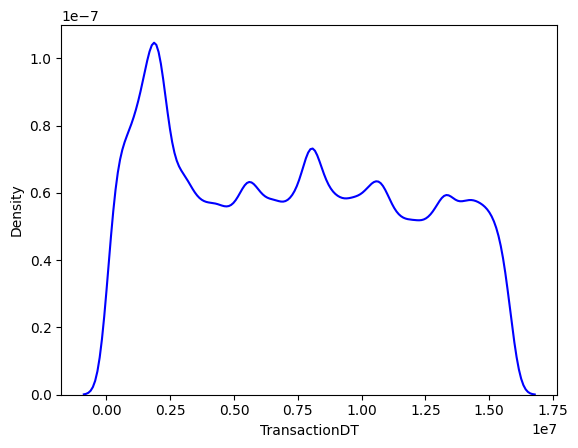

In [35]:
sns.kdeplot(train['TransactionDT'], color = 'b')
print('skewness')
print(train[['TransactionDT']].skew())

## 3.2 TransactionAmt

skewness
TransactionAmt    14.4
dtype: float64


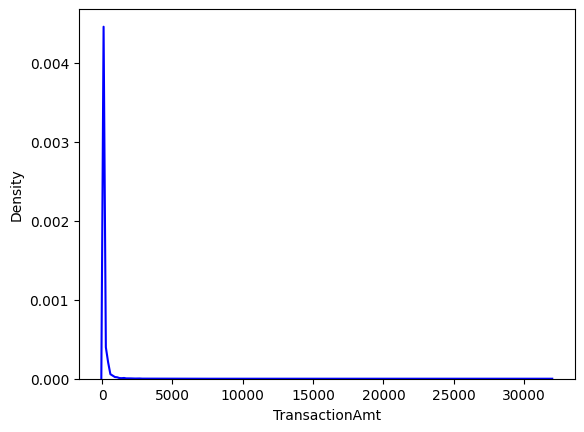

In [36]:
sns.kdeplot(train['TransactionAmt'], color = 'b')
print('skewness')
print(train[['TransactionAmt']].skew())

## 3.3 Card1

skewness
card1   -4.1e-02
dtype: float64


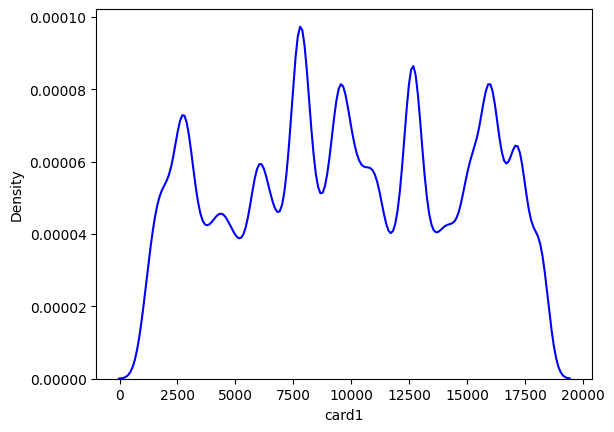

In [37]:
sns.kdeplot(train['card1'], color = 'b')
print('skewness')
print(train[['card1']].skew())

## 3.4 Card2

skewness
card2   -0.2
dtype: float64


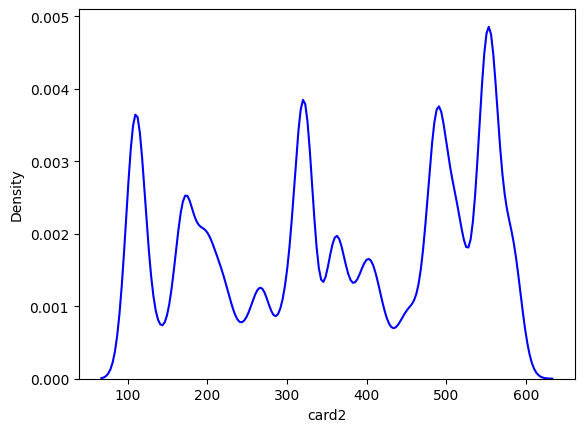

In [38]:
sns.kdeplot(train['card2'], color = 'b')
print('skewness')
print(train[['card2']].skew())

## 3.5 Card3

skewness
card3    2.0
dtype: float64


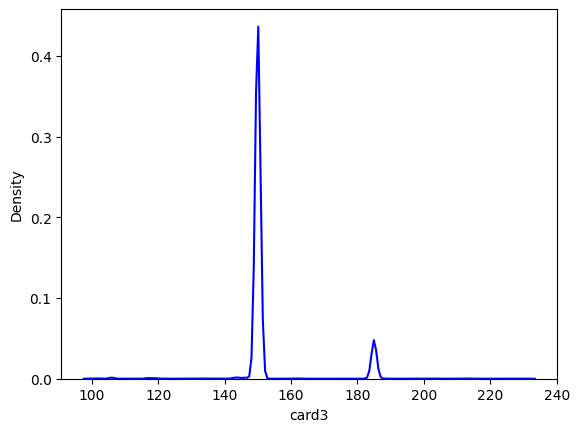

In [39]:
sns.kdeplot(train['card3'], color = 'b')
print('skewness')
print(train[['card3']].skew())

## 3.6 Card5

skewness
card5   -1.2
dtype: float64


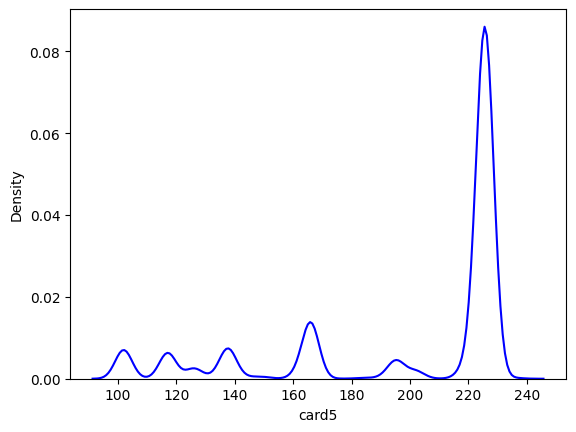

In [40]:
sns.kdeplot(train['card5'], color = 'b')
print('skewness')
print(train[['card5']].skew())

## 3.7 C1

skewness
C1    23.957544
dtype: float64


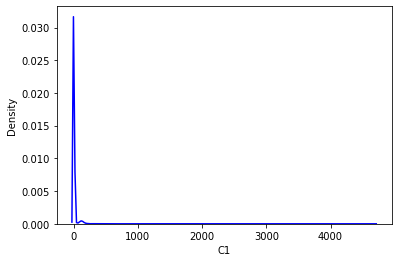

In [ ]:
sns.kdeplot(train['C1'], color = 'b')
print('skewness')
print(train[['C1']].skew())

## 3.8 D3

skewness
D3    4.539278
dtype: float64


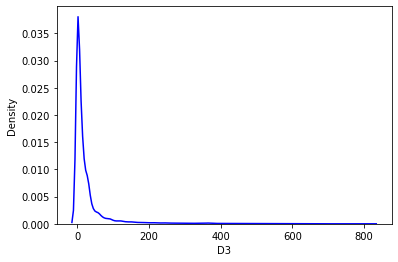

In [ ]:
sns.kdeplot(train['D3'], color = 'b')
print('skewness')
print(train[['D3']].skew())

## 3.9 V222

skewness
V222    44.06854
dtype: float64


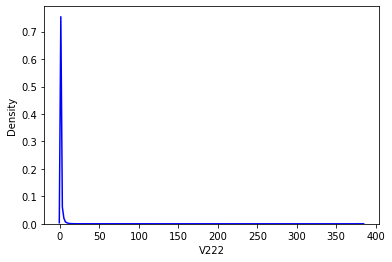

In [ ]:
sns.kdeplot(train['V222'], color = 'b')
print('skewness')
print(train[['V222']].skew())

# 4 Class Distribution

## 4.1 Card Issuer

              card4   count  percentage
0  american express    8328    1.414011
1          discover    6651    1.129273
2        mastercard  189217   32.127146
3              visa  384767   65.329571


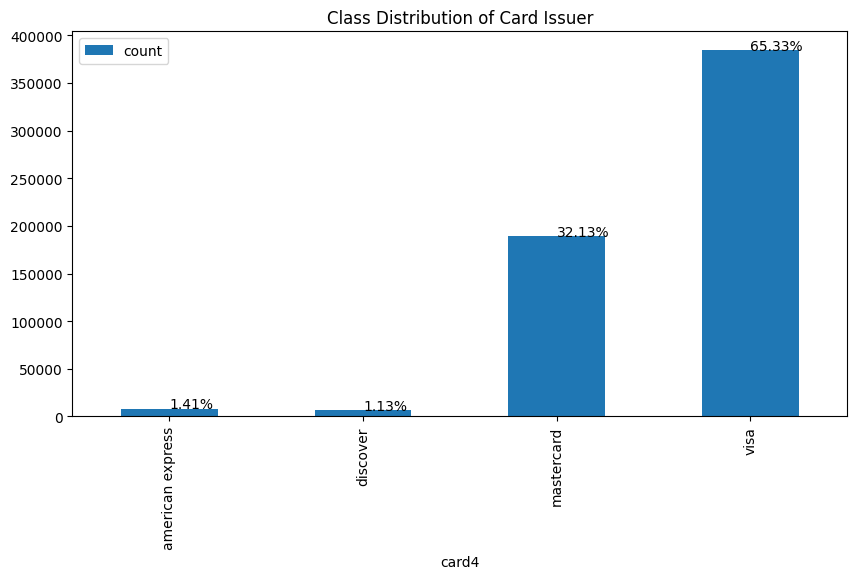

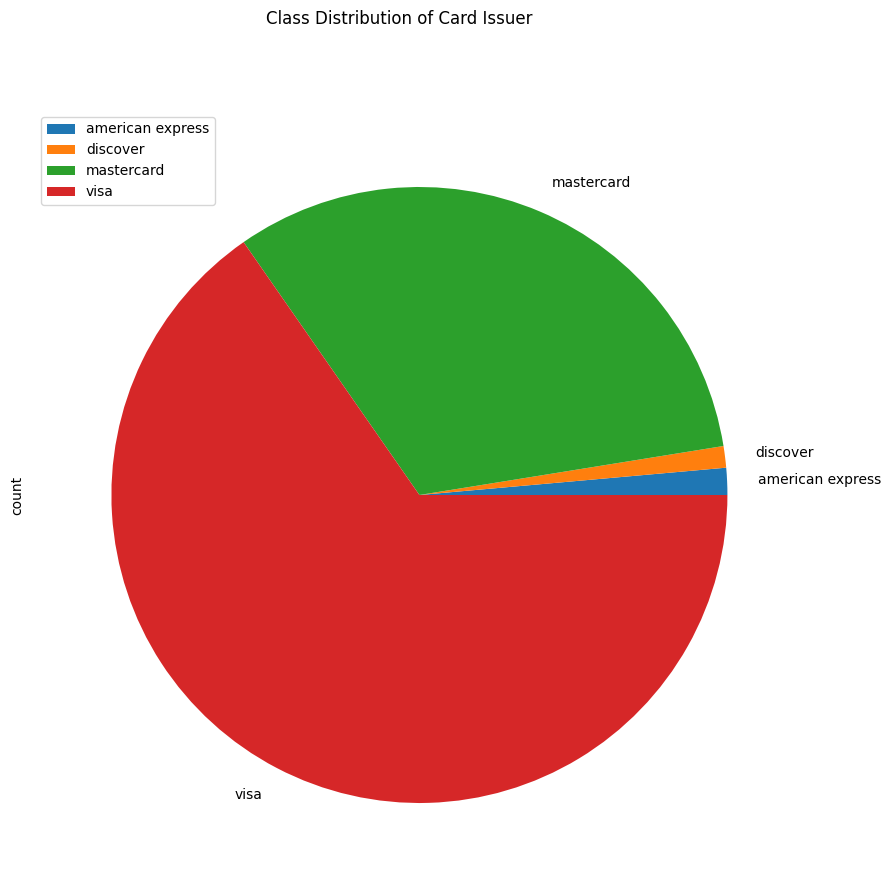

In [ ]:
class_counts = pd.DataFrame(train.groupby('card4').size(),columns=['count']).reset_index()
class_counts['percentage']=class_counts['count']/class_counts['count'].sum()*100
print(class_counts)
ax = class_counts.plot(x='card4',y='count',kind='bar',title='Class Distribution of Card Issuer',figsize=(10,5));
[ax.text(i, class_counts.loc[i]['count'],
         '{:.2f}%'.format(class_counts.loc[i].percentage)) for i in class_counts.index];

class_counts = pd.DataFrame(train.groupby('card4').size(),columns=['count']).reset_index()
#class_counts = class_counts[class_counts['count']>=10].reset_index()
class_counts['percentage']=class_counts['count']/class_counts['count'].sum()*100
ax = class_counts.plot(x='card4',y='count',kind='pie',title='Class Distribution of Card Issuer',figsize=(16,10),
                       subplots=True, labels=class_counts.card4);

In [ ]:
for i in class_counts.index:
    if (class_counts.loc[i].percentage/100)>=0.25:
        print(class_counts.loc[i]['card4'] + " is balanced")
    elif (class_counts.loc[i].percentage/100)>=0.1:
        print(class_counts.loc[i]['card4'] + " is Slightly Imbalance")
    else:
        print(class_counts.loc[i]['card4'] + " is Severely Imbalance")
        

american express is Severely Imbalance
discover is Severely Imbalance
mastercard is balanced
visa is balanced


## 4.2 Card Type

             card6   count  percentage
0      charge card      15    0.002547
1           credit  148986   25.296068
2            debit  439938   74.696291
3  debit or credit      30    0.005094


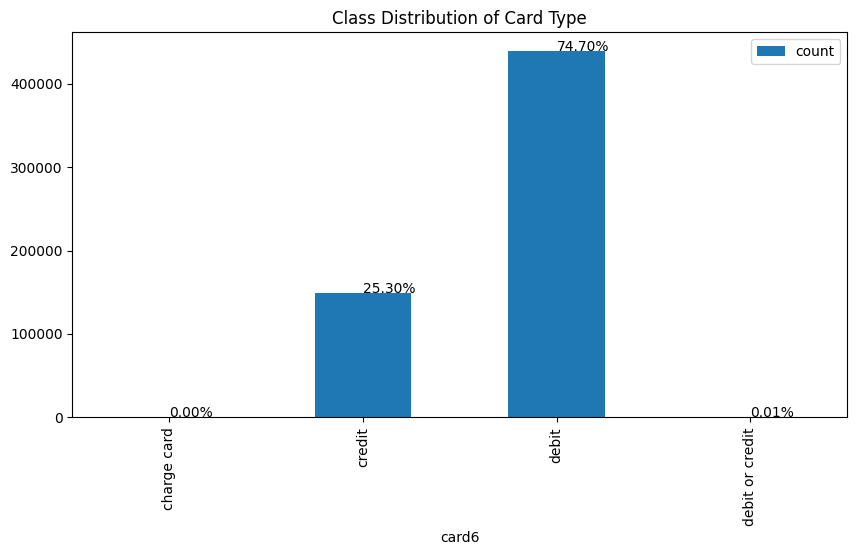

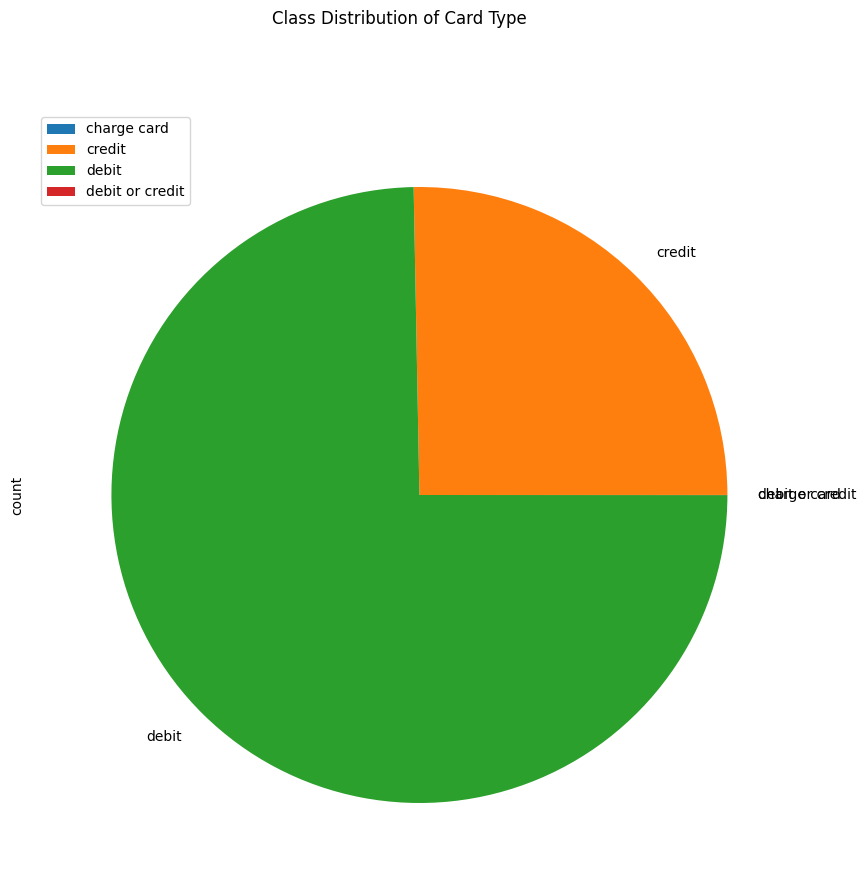

In [ ]:
class_counts = pd.DataFrame(train.groupby('card6').size(),columns=['count']).reset_index()
class_counts['percentage']=class_counts['count']/class_counts['count'].sum()*100
print(class_counts)
ax = class_counts.plot(x='card6',y='count',kind='bar',title='Class Distribution of Card Type',figsize=(10,5));
[ax.text(i, class_counts.loc[i]['count'],
         '{:.2f}%'.format(class_counts.loc[i].percentage)) for i in class_counts.index];

class_counts = pd.DataFrame(train.groupby('card6').size(),columns=['count']).reset_index()
#class_counts = class_counts[class_counts['count']>=10].reset_index()
class_counts['percentage']=class_counts['count']/class_counts['count'].sum()*100
ax = class_counts.plot(x='card6',y='count',kind='pie',title='Class Distribution of Card Type',figsize=(16,10),
                       subplots=True, labels=class_counts.card6);

In [ ]:
for i in class_counts.index:
    if (class_counts.loc[i].percentage/100)>=0.25:
        print(class_counts.loc[i]['card6'] + " is balanced")
    elif (class_counts.loc[i].percentage/100)>=0.1:
        print(class_counts.loc[i]['card6'] + " is Slightly Imbalance")
    else:
        print(class_counts.loc[i]['card6'] + " is Severely Imbalance")
        

charge card is Severely Imbalance
credit is balanced
debit is balanced
debit or credit is Severely Imbalance


## 4.3 Product CD

  ProductCD   count  percentage
0         C   68519   11.602770
1         H   33024    5.592170
2         R   37699    6.383818
3         S   11628    1.969045
4         W  439670   74.452196


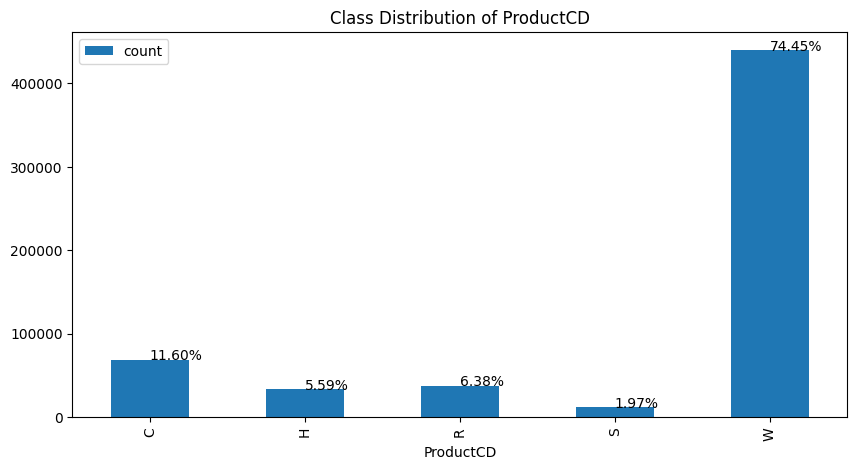

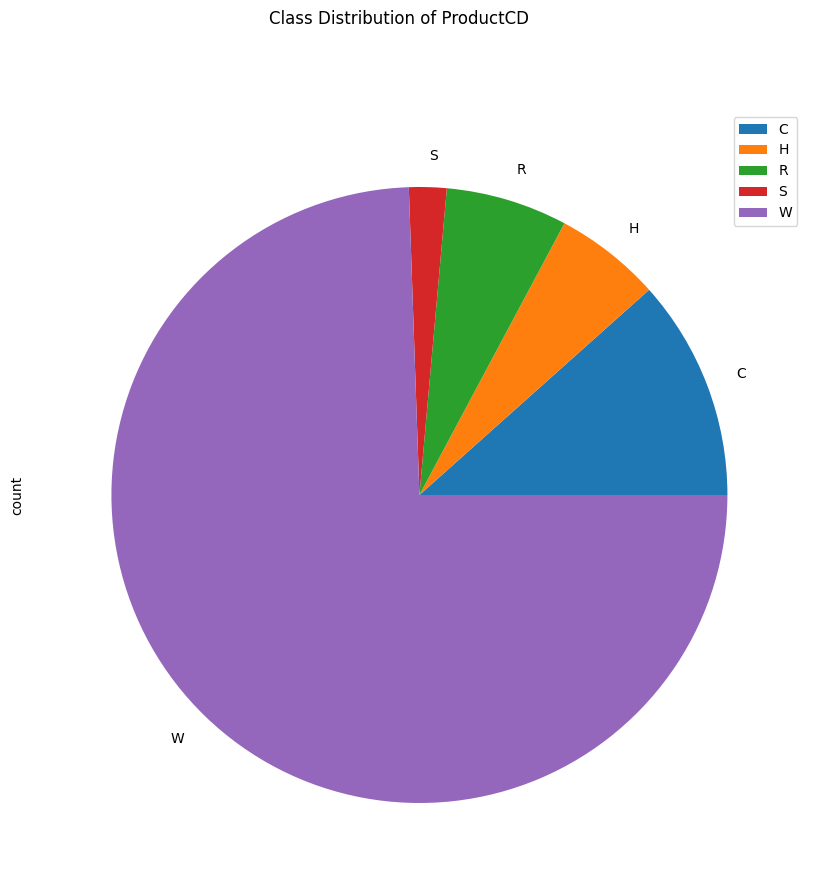

In [ ]:
class_counts = pd.DataFrame(train.groupby('ProductCD').size(),columns=['count']).reset_index()
class_counts['percentage']=class_counts['count']/class_counts['count'].sum()*100
print(class_counts)
ax = class_counts.plot(x='ProductCD',y='count',kind='bar',title='Class Distribution of ProductCD',figsize=(10,5));
[ax.text(i, class_counts.loc[i]['count'],
         '{:.2f}%'.format(class_counts.loc[i].percentage)) for i in class_counts.index];

class_counts = pd.DataFrame(train.groupby('ProductCD').size(),columns=['count']).reset_index()
#class_counts = class_counts[class_counts['count']>=10].reset_index()
class_counts['percentage']=class_counts['count']/class_counts['count'].sum()*100
ax = class_counts.plot(x='ProductCD',y='count',kind='pie',title='Class Distribution of ProductCD',figsize=(16,10),
                       subplots=True, labels=class_counts.ProductCD);

In [ ]:
for i in class_counts.index:
    if (class_counts.loc[i].percentage/100)>=0.25:
        print(class_counts.loc[i]['ProductCD'] + " is balanced")
    elif (class_counts.loc[i].percentage/100)>=0.1:
        print(class_counts.loc[i]['ProductCD'] + " is Slightly Imbalance")
    else:
        print(class_counts.loc[i]['ProductCD'] + " is Severely Imbalance")

C is Slightly Imbalance
H is Severely Imbalance
R is Severely Imbalance
S is Severely Imbalance
W is balanced


## 4.4 Device Type

  DeviceType  count  percentage
0    desktop  85165    60.48221
1     mobile  55645    39.51779


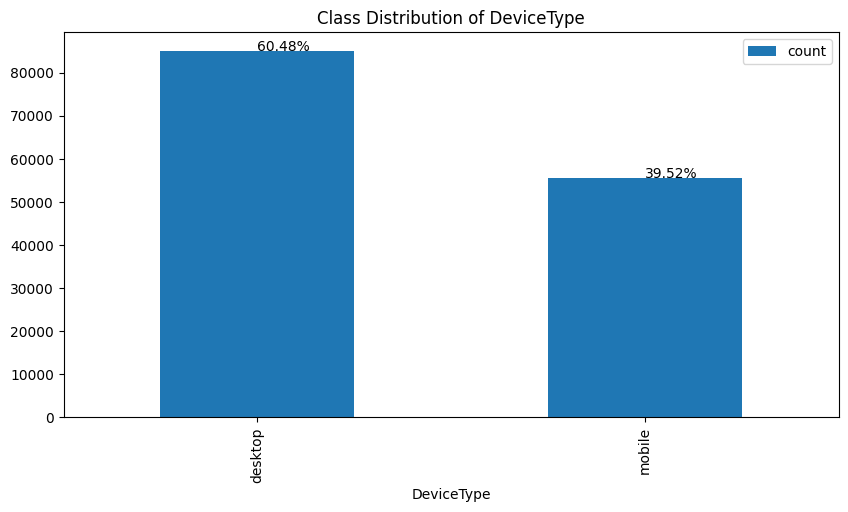

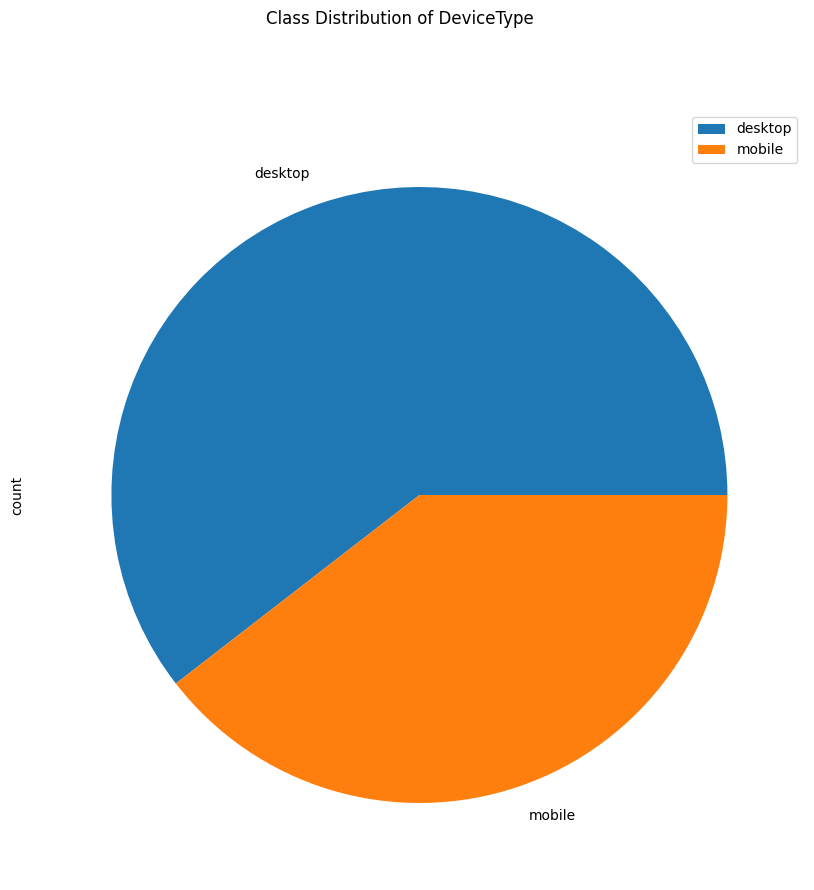

In [ ]:
class_counts = pd.DataFrame(train.groupby('DeviceType').size(),columns=['count']).reset_index()
class_counts['percentage']=class_counts['count']/class_counts['count'].sum()*100
print(class_counts)
ax = class_counts.plot(x='DeviceType',y='count',kind='bar',title='Class Distribution of DeviceType',figsize=(10,5));
[ax.text(i, class_counts.loc[i]['count'],
         '{:.2f}%'.format(class_counts.loc[i].percentage)) for i in class_counts.index];

class_counts = pd.DataFrame(train.groupby('DeviceType').size(),columns=['count']).reset_index()
#class_counts = class_counts[class_counts['count']>=10].reset_index()
class_counts['percentage']=class_counts['count']/class_counts['count'].sum()*100
ax = class_counts.plot(x='DeviceType',y='count',kind='pie',title='Class Distribution of DeviceType',figsize=(16,10),
                       subplots=True, labels=class_counts.DeviceType);

In [ ]:
for i in class_counts.index:
    if (class_counts.loc[i].percentage/100)>=0.25:
        print(class_counts.loc[i]['DeviceType'] + " is balanced")
    elif (class_counts.loc[i].percentage/100)>=0.1:
        print(class_counts.loc[i]['DeviceType'] + " is Slightly Imbalance")
    else:
        print(class_counts.loc[i]['DeviceType'] + " is Severely Imbalance")

desktop is balanced
mobile is balanced


## 4.5 isFraud

   isFraud   count  percentage
0        0  569877        96.5
1        1   20663         3.5


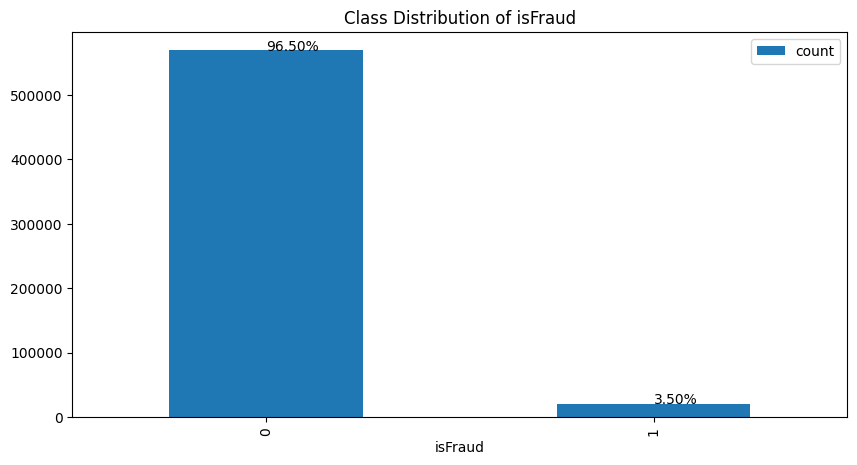

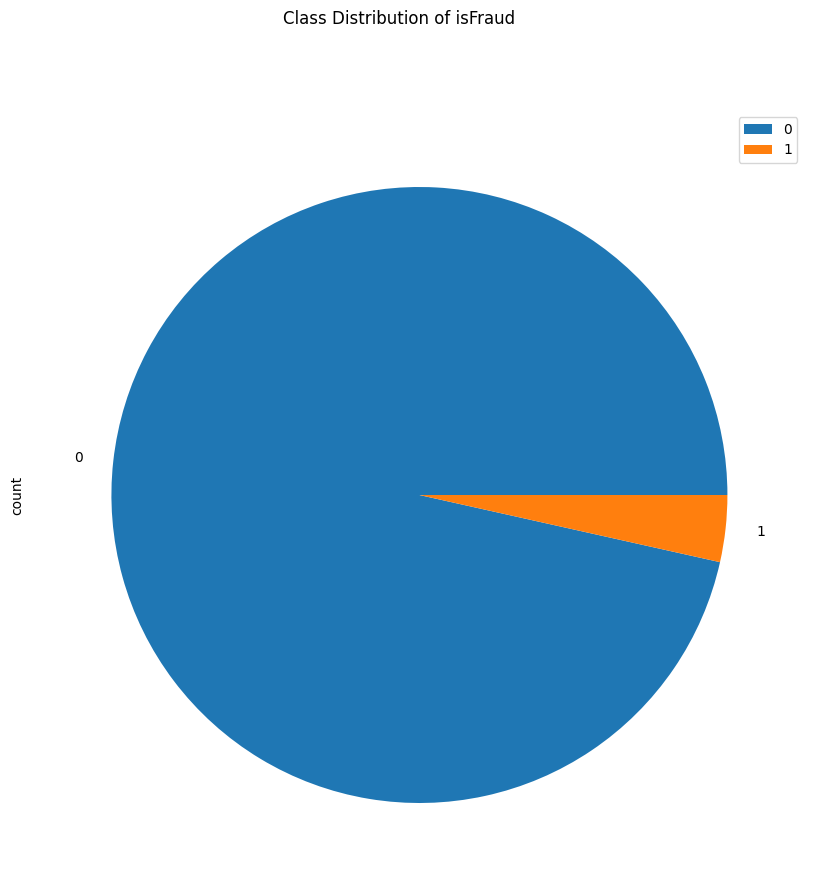

In [175]:
class_counts = pd.DataFrame(train_left_join.groupby('isFraud').size(),columns=['count']).reset_index()
class_counts['percentage']=class_counts['count']/class_counts['count'].sum()*100
print(class_counts)
ax = class_counts.plot(x='isFraud',y='count',kind='bar',title='Class Distribution of isFraud',figsize=(10,5));
[ax.text(i, class_counts.loc[i]['count'],
         '{:.2f}%'.format(class_counts.loc[i].percentage)) for i in class_counts.index];

class_counts = pd.DataFrame(train_left_join.groupby('isFraud').size(),columns=['count']).reset_index()
#class_counts = class_counts[class_counts['count']>=10].reset_index()
class_counts['percentage']=class_counts['count']/class_counts['count'].sum()*100
ax = class_counts.plot(x='isFraud',y='count',kind='pie',title='Class Distribution of isFraud',figsize=(16,10),
                       subplots=True, labels=class_counts.isFraud);

In [ ]:
for i in class_counts.index:
    if (class_counts.loc[i].percentage/100)>=0.25:
        print(class_counts.loc[i]['isFraud'].astype(str) + " is balanced")
    elif (class_counts.loc[i].percentage/100)>=0.1:
        print(class_counts.loc[i]['isFraud'].astype(str) + " is Slightly Imbalance")
    else:
        print(class_counts.loc[i]['isFraud'].astype(str) + " is Severely Imbalance")

0.0 is balanced
1.0 is Severely Imbalance


## 4.6 Email Domain

       R_emaildomain  count  percentage
0            aim.com     36    0.026222
1      anonymous.com  20529   14.952910
2            aol.com   3701    2.695734
3            att.net    430    0.313203
4      bellsouth.net    422    0.307376
5       cableone.net     27    0.019666
6    centurylink.net     12    0.008741
7         cfl.rr.com     37    0.026950
8        charter.net    127    0.092504
9        comcast.net   1812    1.319824
10           cox.net    459    0.334326
11     earthlink.net     79    0.057542
12    embarqmail.com     68    0.049530
13      frontier.com     52    0.037876
14   frontiernet.net     14    0.010197
15             gmail     95    0.069196
16         gmail.com  57147   41.624724
17            gmx.de    147    0.107072
18     hotmail.co.uk    105    0.076480
19       hotmail.com  27509   20.037002
20        hotmail.de     42    0.030592
21        hotmail.es    292    0.212687
22        hotmail.fr    293    0.213415
23        icloud.com   1398    1.018275


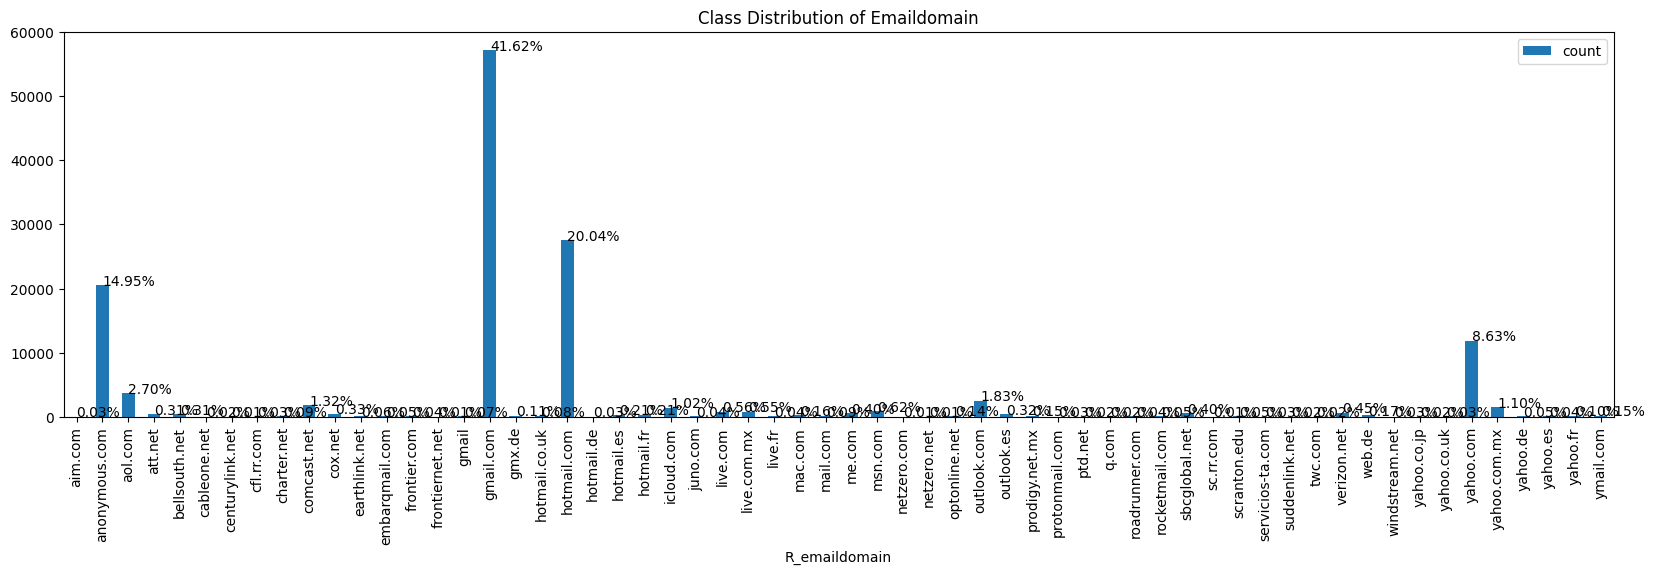

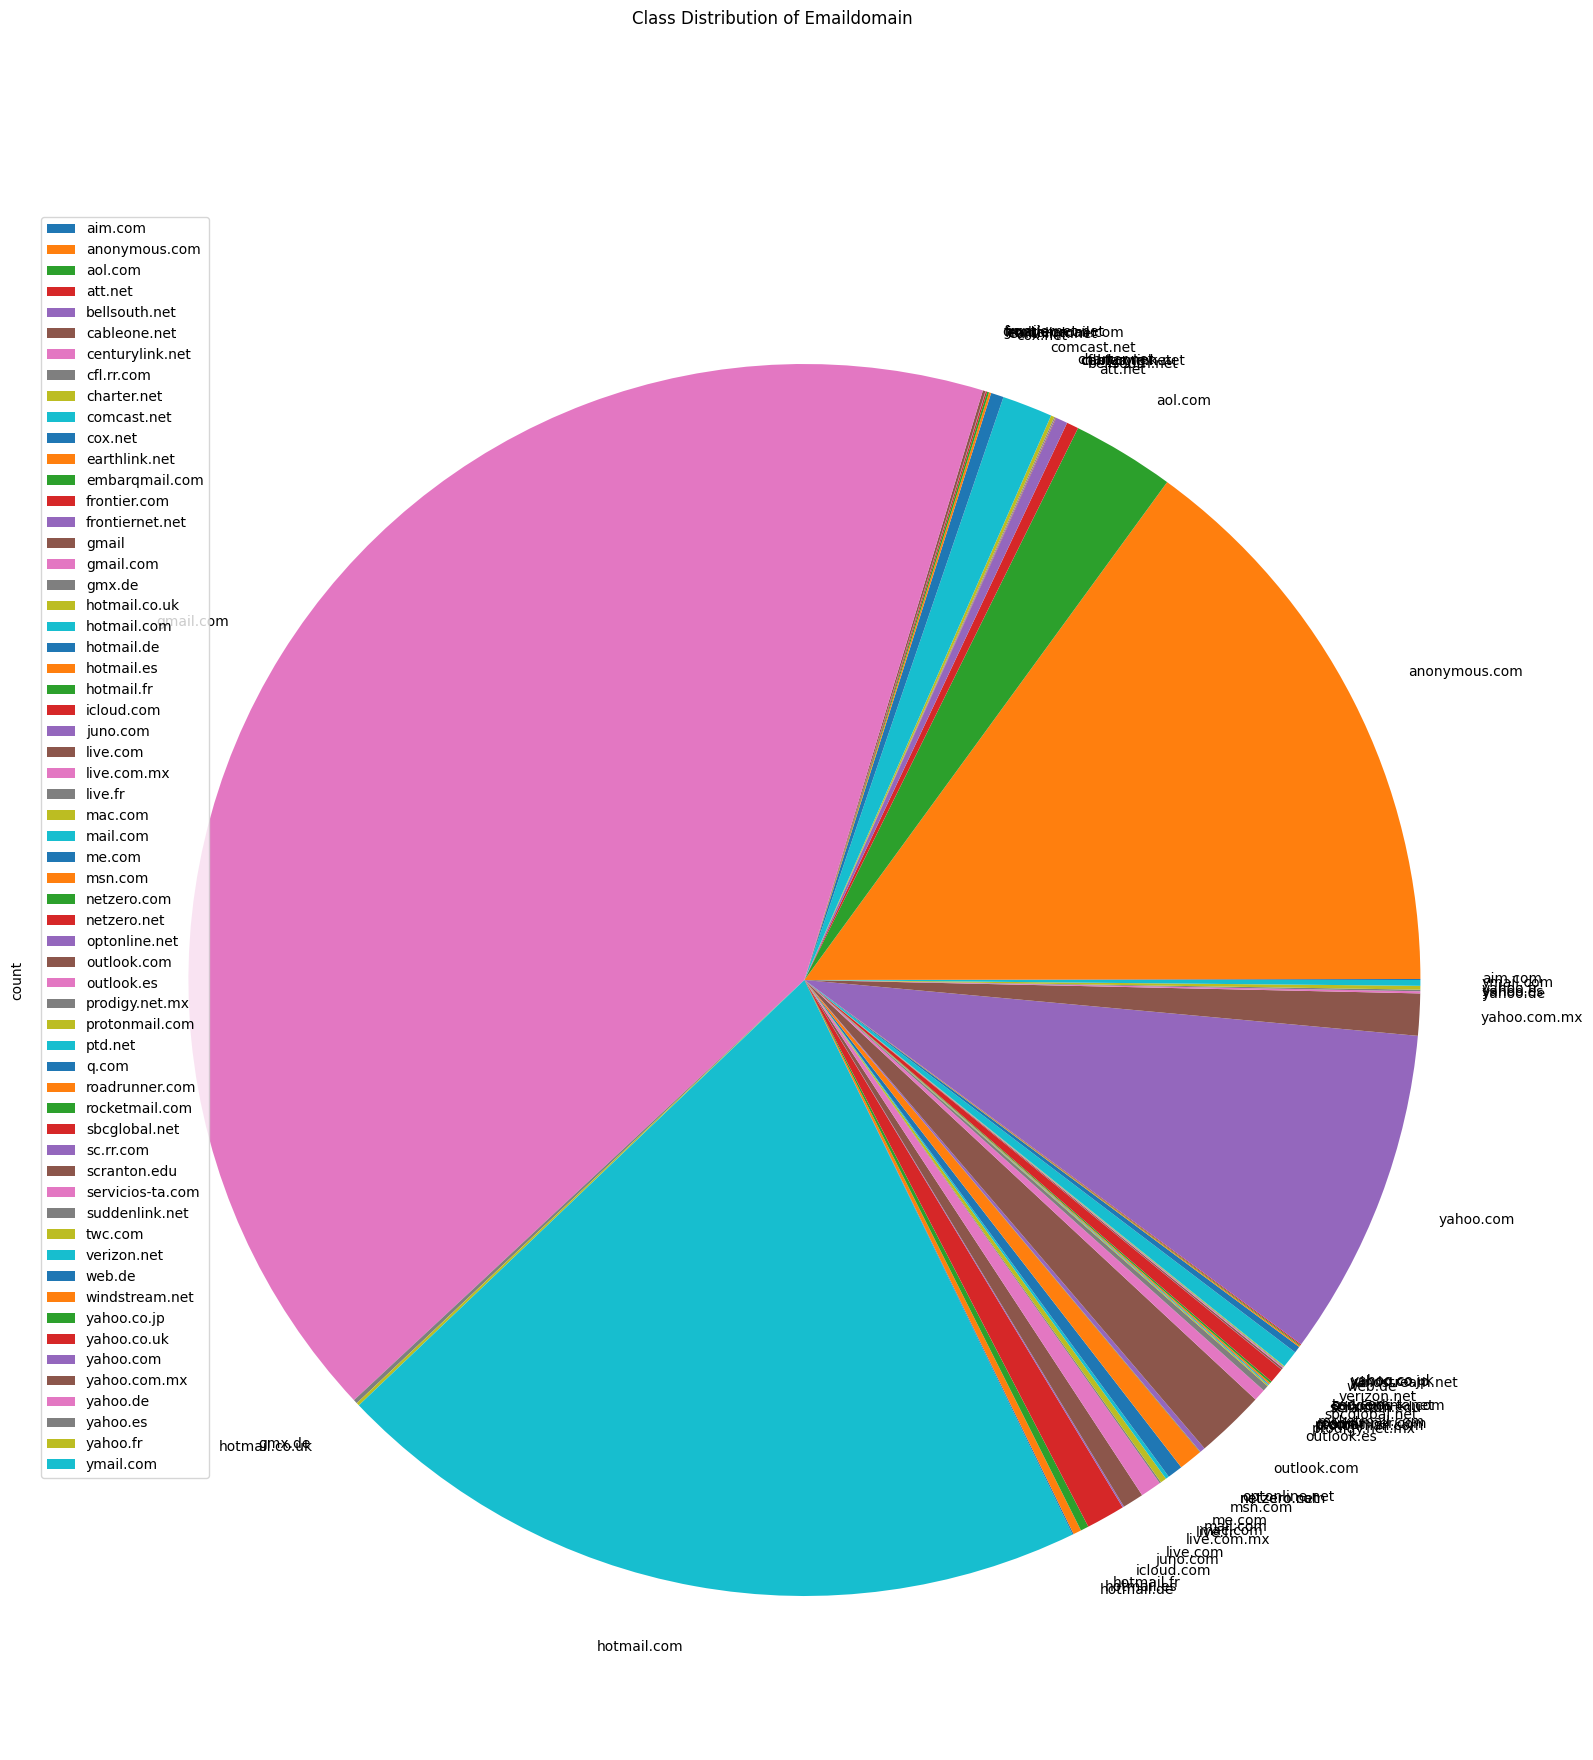

In [ ]:
class_counts = pd.DataFrame(train.groupby('R_emaildomain').size(),columns=['count']).reset_index()
class_counts['percentage']=class_counts['count']/class_counts['count'].sum()*100
print(class_counts)
ax = class_counts.plot(x='R_emaildomain',y='count',kind='bar',title='Class Distribution of Emaildomain',figsize=(20,5));
[ax.text(i, class_counts.loc[i]['count'],
         '{:.2f}%'.format(class_counts.loc[i].percentage)) for i in class_counts.index];

class_counts = pd.DataFrame(train.groupby('R_emaildomain').size(),columns=['count']).reset_index()
#class_counts = class_counts[class_counts['count']>=10].reset_index()
class_counts['percentage']=class_counts['count']/class_counts['count'].sum()*100
ax = class_counts.plot(x='R_emaildomain',y='count',kind='pie',title='Class Distribution of Emaildomain',figsize=(26,20),
                       subplots=True,labels=class_counts.R_emaildomain);

In [ ]:
for i in class_counts.index:
    if (class_counts.loc[i].percentage/100)>=0.25:
        print(class_counts.loc[i]['R_emaildomain'] + " is balanced")
    elif (class_counts.loc[i].percentage/100)>=0.1:
        print(class_counts.loc[i]['R_emaildomain'] + " is Slightly Imbalance")
    else:
        print(class_counts.loc[i]['R_emaildomain'] + " is Severely Imbalance")

aim.com is Severely Imbalance
anonymous.com is Slightly Imbalance
aol.com is Severely Imbalance
att.net is Severely Imbalance
bellsouth.net is Severely Imbalance
cableone.net is Severely Imbalance
centurylink.net is Severely Imbalance
cfl.rr.com is Severely Imbalance
charter.net is Severely Imbalance
comcast.net is Severely Imbalance
cox.net is Severely Imbalance
earthlink.net is Severely Imbalance
embarqmail.com is Severely Imbalance
frontier.com is Severely Imbalance
frontiernet.net is Severely Imbalance
gmail is Severely Imbalance
gmail.com is balanced
gmx.de is Severely Imbalance
hotmail.co.uk is Severely Imbalance
hotmail.com is Slightly Imbalance
hotmail.de is Severely Imbalance
hotmail.es is Severely Imbalance
hotmail.fr is Severely Imbalance
icloud.com is Severely Imbalance
juno.com is Severely Imbalance
live.com is Severely Imbalance
live.com.mx is Severely Imbalance
live.fr is Severely Imbalance
mac.com is Severely Imbalance
mail.com is Severely Imbalance
me.com is Severely I

# 5 Correlations between features
## 5.1 Correlation Coffeicents
The correlation coefficient is a statistical measure of the strength of a linear relationship between two variables

In [22]:
train

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
0             2987000        0          86400       68.500000         W   
1             2987001        0          86401       29.000000         W   
2             2987002        0          86469       59.000000         W   
3             2987003        0          86499       50.000000         W   
4             2987004        0          86506       50.000000         H   
...               ...      ...            ...             ...       ...   
590535        3577535        0       15811047       49.000000         W   
590536        3577536        0       15811049       39.500000         W   
590537        3577537        0       15811079       30.953125         W   
590538        3577538        0       15811088      117.000000         W   
590539        3577539        0       15811131      280.000000         W   

        card1  card2  card3       card4  card5  ...                id_31  \
0       13926    NaN  150.0    discover  142.0  ...                  NaN   
1        2755  404.0  150.0  mastercard  102.0  ...                  NaN   
2        4663  490.0  150.0        visa  166.0  ...                  NaN   
3       18132  567.0  150.0  mastercard  117.0  ...                  NaN   
4        4497  514.0  150.0  mastercard  102.0  ...  samsung browser 6.2   
...       ...    ...    ...         ...    ...  ...                  ...   
590535   6550    NaN  150.0        visa  226.0  ...                  NaN   
590536  10444  225.0  150.0  mastercard  224.0  ...                  NaN   
590537  12037  595.0  150.0  mastercard  224.0  ...                  NaN   
590538   7826  481.0  150.0  mastercard  224.0  ...                  NaN   
590539  15066  170.0  150.0  mastercard  102.0  ...                  NaN   

        id_32      id_33           id_34  id_35 id_36 id_37  id_38  \
0         NaN        NaN             NaN    NaN   NaN   NaN    NaN   
1         NaN        NaN             NaN    NaN   NaN   NaN    NaN   
2         NaN        NaN             NaN    NaN   NaN   NaN    NaN   
3         NaN        NaN             NaN    NaN   NaN   NaN    NaN   
4        32.0  2220x1080  match_status:2      T     F     T      T   
...       ...        ...             ...    ...   ...   ...    ...   
590535    NaN        NaN             NaN    NaN   NaN   NaN    NaN   
590536    NaN        NaN             NaN    NaN   NaN   NaN    NaN   
590537    NaN        NaN             NaN    NaN   NaN   NaN    NaN   
590538    NaN        NaN             NaN    NaN   NaN   NaN    NaN   
590539    NaN        NaN             NaN    NaN   NaN   NaN    NaN   

        DeviceType                     DeviceInfo  
0              NaN                            NaN  
1              NaN                            NaN  
2              NaN                            NaN  
3              NaN                            NaN  
4           mobile  SAMSUNG SM-G892A Build/NRD90M  
...            ...                            ...  
590535         NaN                            NaN  
590536         NaN                            NaN  
590537         NaN                            NaN  
590538         NaN                            NaN  
590539         NaN                            NaN  

[590540 rows x 434 columns]

<AxesSubplot:title={'center':'Correlation between isFraud and C Columns'}>

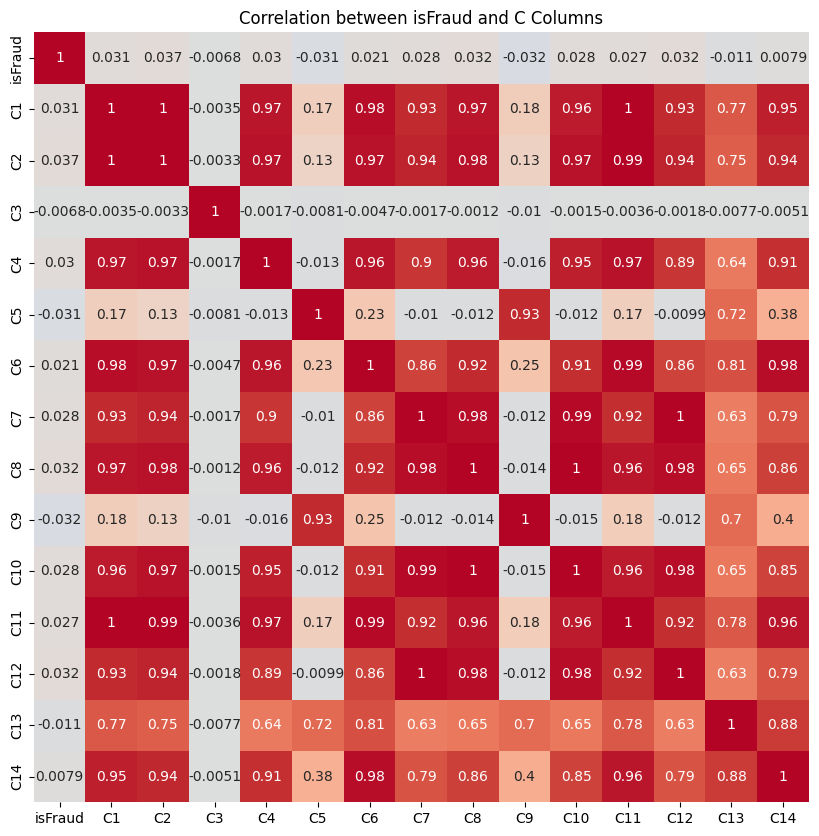

In [21]:
#A heat map is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions.
cor_data = train.filter(regex='isFraud|C')
plt.figure(figsize=(10,10))
plt.title('Correlation between isFraud and C Columns')
sns.heatmap(cor_data.corr(), vmin=-1, vmax=1, cmap = 'coolwarm', annot = True, cbar=False)

<AxesSubplot:title={'center':'Correlation between isFraud and D Columns'}>

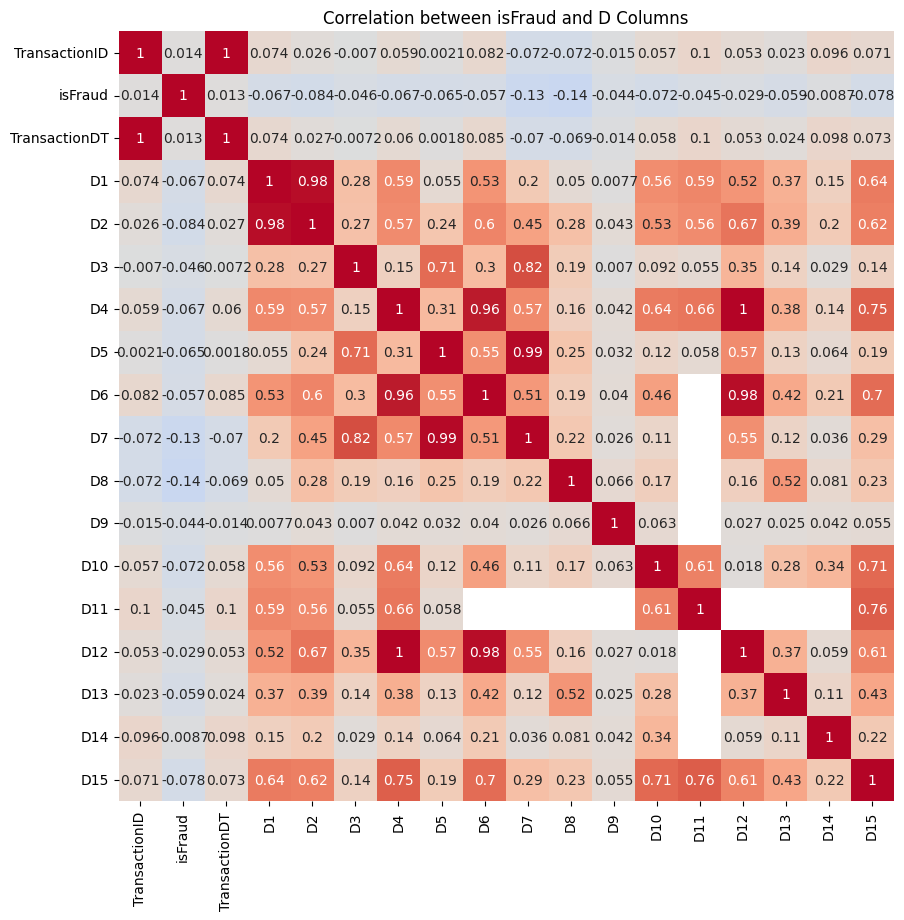

In [19]:
cor_data = train.filter(regex='isFraud|D')
plt.figure(figsize=(10,10))
plt.title('Correlation between isFraud and D Columns')
sns.heatmap(cor_data.corr(), vmin=-1, vmax=1, cmap = 'coolwarm', annot = True, cbar=False)

In [16]:
Ms = ['M'+str(x) for x in range(1,10)]
mp = {'F':0,'T':1,'M0':0,'M1':1,'M2':2}
for c in Ms: 
    train[c] = train[c].map(mp)

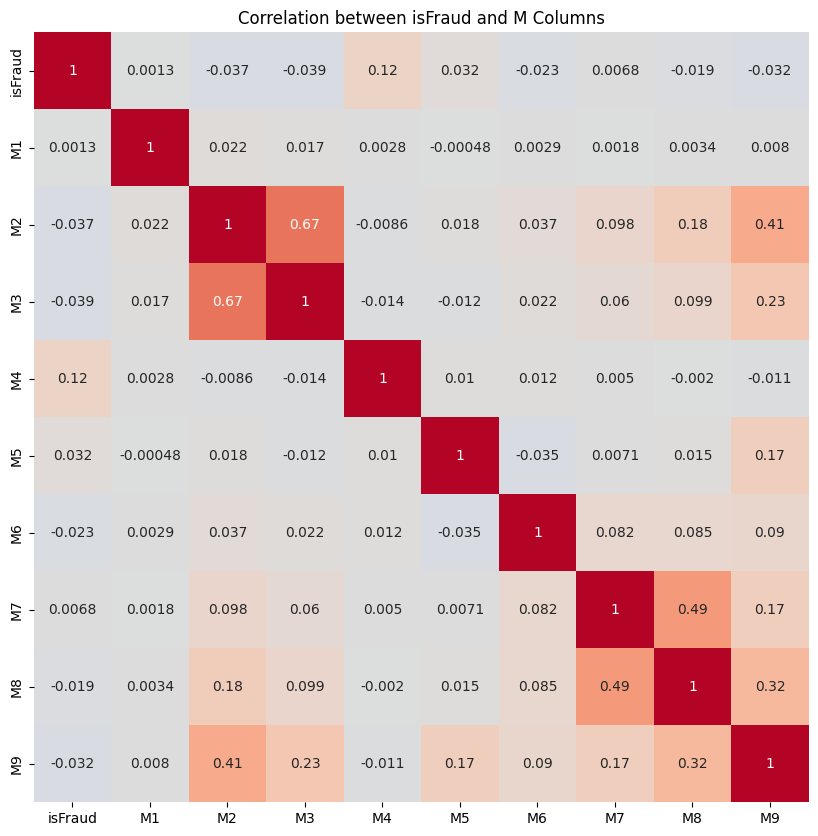

In [20]:
cols = ['isFraud'] + Ms
plt.figure(figsize=(10,10))
plt.title('Correlation between isFraud and M Columns')
sns.heatmap(train[cols].corr(), cmap='coolwarm', annot=True, center=0.0, cbar=False)
plt.show()

<AxesSubplot:title={'center':'Correlation between isFraud and id Columns'}>

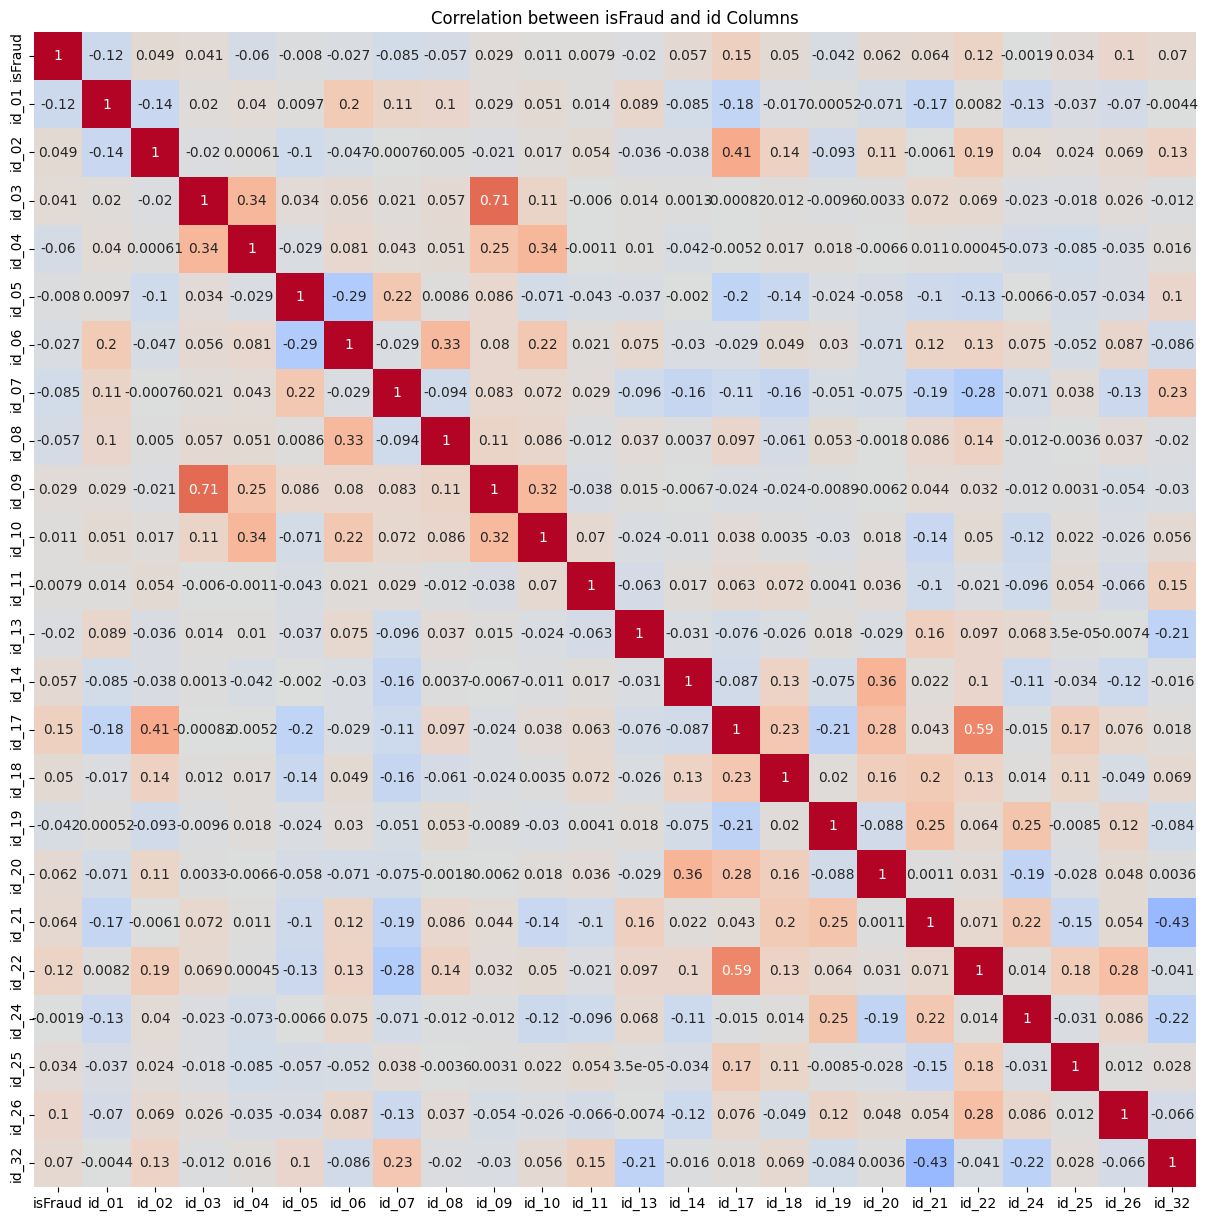

In [24]:
cor_data = train.filter(regex='isFraud|id')
plt.figure(figsize=(15,15))
plt.title('Correlation between isFraud and id Columns')
sns.heatmap(cor_data.corr(), vmin=-1, vmax=1, cmap = 'coolwarm', annot = True, cbar=False)

<AxesSubplot:xlabel='D3', ylabel='C11'>

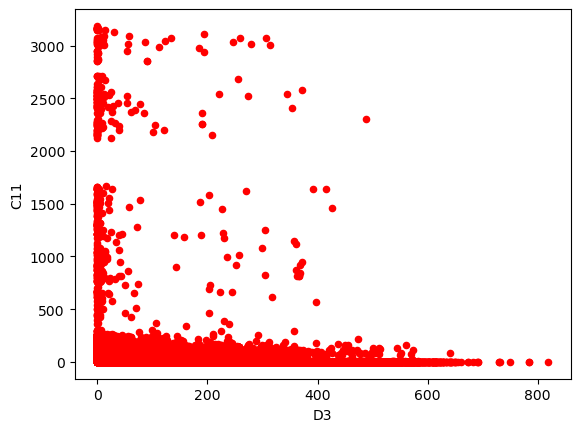

In [6]:
#pandas scatter plot between two variables
numeric_data.plot(x='D3',y='C11',kind='scatter',color = 'Red')

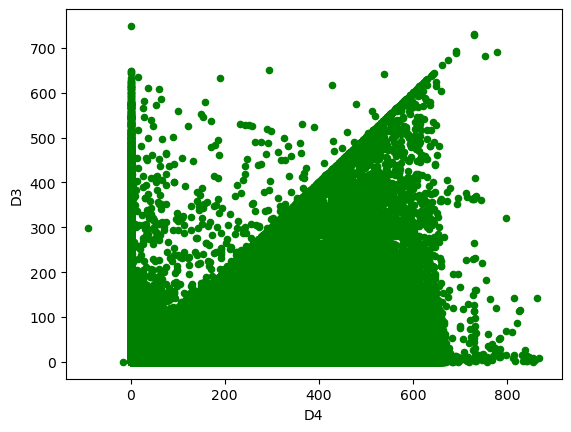

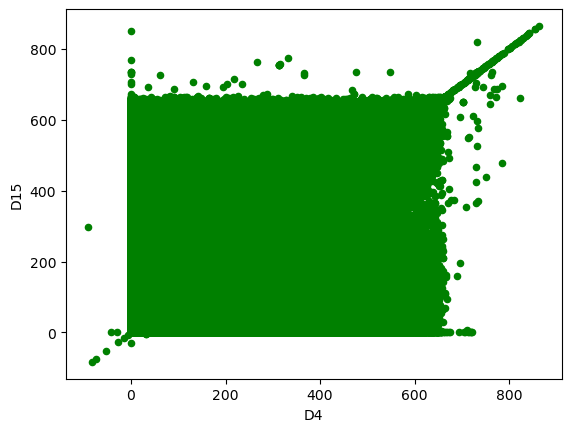

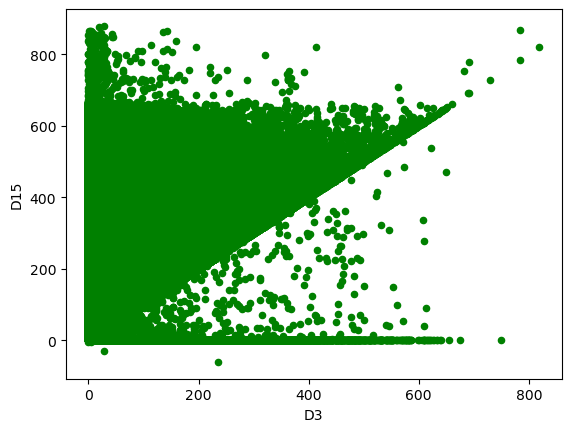

In [7]:
cols = ['D4','D3', 'D15']
for i in range(len(cols)):
    for j in range(i, len(cols)):
        if(i != j):
            numeric_data.plot(x=cols[i], y=cols[j], kind='scatter', color='green')

<AxesSubplot:xlabel='D3', ylabel='C11'>

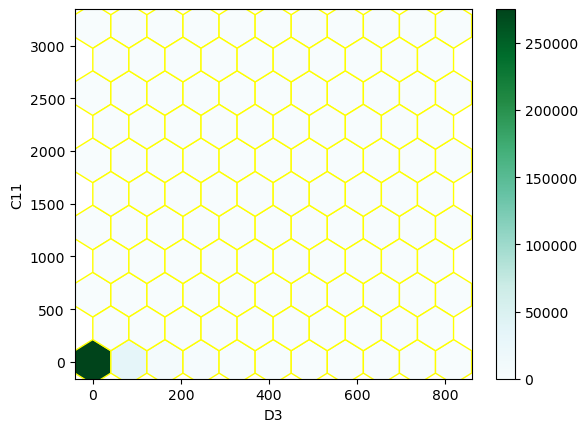

In [8]:
#pandas hexbin plot between two variables
numeric_data.plot(x='D3',y='C11',kind='hexbin',color = 'Yellow', gridsize =10)

<AxesSubplot:xlabel='TransactionAmt', ylabel='V33'>

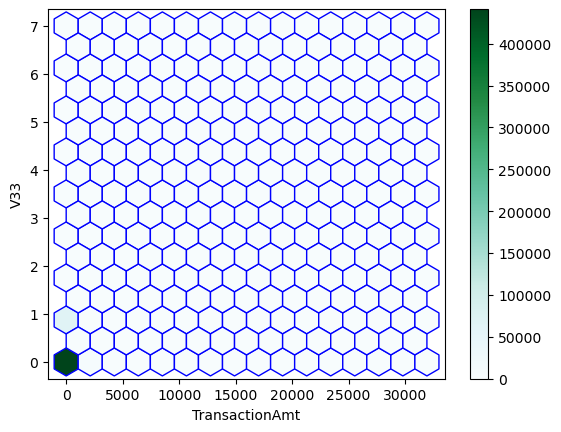

In [9]:
#pandas hexbin plot between two variables
numeric_data.plot(x='TransactionAmt',y='V33',kind='hexbin',color = 'Blue', gridsize=15)

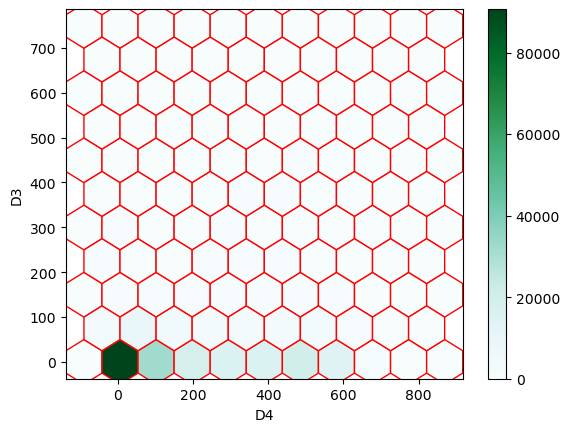

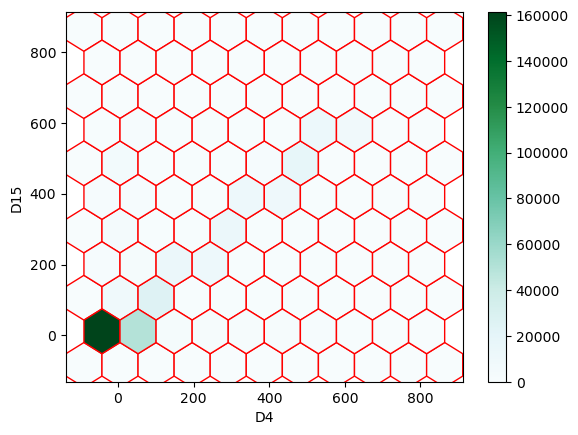

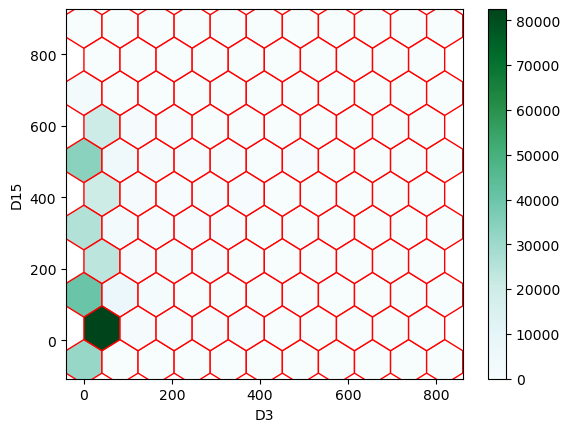

In [10]:
cols = ['D4','D3', 'D15']
for i in range(len(cols)):
    for j in range(i, len(cols)):
        if(i != j):
            numeric_data.plot(x=cols[i], y=cols[j], kind='hexbin', color='red', gridsize=10)

## 5.2 Chi-square test
The chi-square test is to test if two categorical features are independent, or not. The null hypothesis ($H_0$) is that two observed features are independent. The alternative hypothesis ($H_a$) is that the two observed features are dependent.

In [11]:
# the significant value that will be used is 0.05
sig_value = 0.05

### 5.2.1 ProductCD and Card4
$H_0$: ProductCD and Card4 are independent $\newline$
$H_a$: ProductCD and Card4 are dependent

In [12]:
pd.DataFrame(train, columns = ['ProductCD', 'card4'])

ProductCD       card4
0              W    discover
1              W  mastercard
2              W        visa
3              W  mastercard
4              H  mastercard
...          ...         ...
590535         W        visa
590536         W  mastercard
590537         W  mastercard
590538         W  mastercard
590539         W  mastercard

[590540 rows x 2 columns]

In [13]:
table = pd.crosstab(train['ProductCD'], train['card4'])
table

card4      american express  discover  mastercard    visa
ProductCD                                                
C                         2         0       27418   40904
H                      1566       603        7938   22907
R                      6138      1089        7432   23039
S                       622       580        4042    6384
W                         0      4379      142387  291533

In [14]:
observed_values = table.values
observed_values

array([[     2,      0,  27418,  40904],
       [  1566,    603,   7938,  22907],
       [  6138,   1089,   7432,  23039],
       [   622,    580,   4042,   6384],
       [     0,   4379, 142387, 291533]], dtype=int64)

After finding the observed values, we will calculate the chi2 test statistic from the above table. Then we'll calculate the critical value and compare the values.

In [15]:
import scipy.stats as sp
from scipy.stats import chi2_contingency

#chi2 test stat, p-value, degrees of freedom expected frequencies
chi2_stat, p, dof, expected_freq = sp.chi2_contingency(table)
print('chi2 test stat =', round(chi2_stat, 4))
print('degrees of freedom =', dof)

chi2 test stat = 78171.3003
degrees of freedom = 12


In [16]:
from scipy.stats import chi2

crit_value = chi2.ppf(1 - sig_value, dof)
print("critical value =", round(crit_value, 4))
print()

if (chi2_stat >= crit_value):
    print("Because the chi2 test statisic is at least as large as the critical value,",
          "we reject the null hypothesis.")
    print("ProductCD and card4 are dependent features")
else:
    print("Because the chi2 test statisic is less than as the critical value,",
          "we do not reject the null hypothesis.")
    print("ProductCD and card4 are independent features")

critical value = 21.0261

Because the chi2 test statisic is at least as large as the critical value, we reject the null hypothesis.
ProductCD and card4 are dependent features


 ### 5.2.2 ProductCD and Card5
$H_0$: ProductCD and Card5independent $\newline$
$H_a$: ProductCD and Card5 are dependent

In [17]:
pd.DataFrame(train, columns = ['ProductCD', 'card5'])

ProductCD  card5
0              W  142.0
1              W  102.0
2              W  166.0
3              W  117.0
4              H  102.0
...          ...    ...
590535         W  226.0
590536         W  224.0
590537         W  224.0
590538         W  224.0
590539         W  102.0

[590540 rows x 2 columns]

In [18]:
table = pd.crosstab(train['ProductCD'], train['card5'])
table

card5      100.0  101.0  102.0  104.0  105.0  106.0  107.0  109.0  111.0  \
ProductCD                                                                  
C              4      7   3175      0      0      0      1      0      4   
H            149      0   2577      4      1      0      0      0     13   
R             40      0   2654     17      0      2      0      0      0   
S             11      0   2111      2      1      3      0      0      0   
W            774      0  18588      0      0      0     11      3      8   

card5      112.0  ...  228.0  229.0  230.0  231.0  232.0  233.0  234.0  235.0  \
ProductCD         ...                                                           
C              3  ...     62      0      4      0     61     15      0      0   
H              0  ...     21     33      0      0      4      0      1      0   
R              0  ...    125      5      0      0      0      0      0      0   
S              0  ...     27     20      0      0      0      0      0      0   
W              0  ...     13   1990      0      2      4      4      0      6   

card5      236.0  237.0  
ProductCD                
C              0      0  
H            175      7  
R            434     39  
S             38      3  
W              0      0  

[5 rows x 119 columns]

In [19]:
observed_values = table.values

After finding the observed values, we will calculate the chi2 test statistic from the above table. Then we'll calculate the critical value and compare the values.

In [20]:
#chi2 test stat, p-value, degrees of freedom expected frequencies
chi2_stat, p, dof, expected_freq = sp.chi2_contingency(table)
print('chi2 test stat =', round(chi2_stat, 4))
print('degrees of freedom =', dof)

chi2 test stat = 364652.2048
degrees of freedom = 472


In [21]:
crit_value = chi2.ppf(1 - sig_value, dof)
print("critical value =", round(crit_value, 4))
print()

if (chi2_stat >= crit_value):
    print("Because the chi2 test statisic is at least as large as the critical value,",
          "we reject the null hypothesis.")
    print("ProductCD and card5 are dependent features")
else:
    print("Because the chi2 test statisic is less than as the critical value,",
          "we do not reject the null hypothesis.")
    print("ProductCD and card5 are independent features")

critical value = 523.6487

Because the chi2 test statisic is at least as large as the critical value, we reject the null hypothesis.
ProductCD and card5 are dependent features


### 5.2.3 ProductCD and Card6
$H_0$: ProductCD and Card6 are independent $\newline$
$H_a$: ProductCD and Card6 are dependent

In [22]:
pd.DataFrame(train, columns = ['ProductCD', 'card6'])

ProductCD   card6
0              W  credit
1              W  credit
2              W   debit
3              W   debit
4              H  credit
...          ...     ...
590535         W   debit
590536         W   debit
590537         W   debit
590538         W   debit
590539         W  credit

[590540 rows x 2 columns]

In [23]:
table = pd.crosstab(train['ProductCD'], train['card6'])
table

card6      charge card  credit   debit  debit or credit
ProductCD                                              
C                   12   27551   40763                0
H                    0   17656   15367                0
R                    3   26499   11192                0
S                    0    6527    5100                0
W                    0   70753  367516               30

In [24]:
observed_values = table.values
observed_values

array([[    12,  27551,  40763,      0],
       [     0,  17656,  15367,      0],
       [     3,  26499,  11192,      0],
       [     0,   6527,   5100,      0],
       [     0,  70753, 367516,     30]], dtype=int64)

After finding the observed values, we will calculate the chi2 test statistic from the above table. Then we'll calculate the critical value and compare the values.

In [25]:
#chi2 test stat, p-value, degrees of freedom expected frequencies
chi2_stat, p, dof, expected_freq = sp.chi2_contingency(table)
print('chi2 test stat =', round(chi2_stat, 4))
print('degrees of freedom =', dof)

chi2 test stat = 87807.5884
degrees of freedom = 12


In [26]:
crit_value = chi2.ppf(1 - sig_value, dof)
print("critical value =", round(crit_value, 4))
print()

if (chi2_stat >= crit_value):
    print("Because the chi2 test statisic is at least as large as the critical value,",
          "we reject the null hypothesis.")
    print("ProductCD and card6 are dependent features")
else:
    print("Because the chi2 test statisic is less than as the critical value,",
          "we do not reject the null hypothesis.")
    print("ProductCD and card6 are independent features")

critical value = 21.0261

Because the chi2 test statisic is at least as large as the critical value, we reject the null hypothesis.
ProductCD and card6 are dependent features


### 5.2.4 Card4 and Card5
$H_0$: Card4 and Card5 are independent $\newline$
$H_a$: Card4 and Card5 are dependent

In [27]:
pd.DataFrame(train, columns = ['card4', 'card5'])

card4  card5
0         discover  142.0
1       mastercard  102.0
2             visa  166.0
3       mastercard  117.0
4       mastercard  102.0
...            ...    ...
590535        visa  226.0
590536  mastercard  224.0
590537  mastercard  224.0
590538  mastercard  224.0
590539  mastercard  102.0

[590540 rows x 2 columns]

In [28]:
table = pd.crosstab(train['card4'], train['card6'])
table

card6             charge card  credit   debit  debit or credit
card4                                                         
american express            3    8175     144                0
discover                    0    6304     347                0
mastercard                  0   50772  138415               30
visa                       12   83732  301023                0

In [29]:
observed_values = table.values
observed_values

array([[     3,   8175,    144,      0],
       [     0,   6304,    347,      0],
       [     0,  50772, 138415,     30],
       [    12,  83732, 301023,      0]], dtype=int64)

After finding the observed values, we will calculate the chi2 test statistic from the above table. Then we'll calculate the critical value and compare the values.

In [30]:
#chi2 test stat, p-value, degrees of freedom expected frequencies
chi2_stat, p, dof, expected_freq = sp.chi2_contingency(table)
print('chi2 test stat =', round(chi2_stat, 4))
print('degrees of freedom =', dof)

chi2 test stat = 43314.2477
degrees of freedom = 9


In [31]:
crit_value = chi2.ppf(1 - sig_value, dof)
print("critical value =", round(crit_value, 4))
print()

if (chi2_stat >= crit_value):
    print("Because the chi2 test statisic is at least as large as the critical value,",
          "we reject the null hypothesis.")
    print("Card4 and card5 are dependent features")
else:
    print("Because the chi2 test statisic is less than as the critical value,",
          "we do not reject the null hypothesis.")
    print("Card4 and card5 are independent features")

critical value = 16.919

Because the chi2 test statisic is at least as large as the critical value, we reject the null hypothesis.
Card4 and card5 are dependent features


### 5.2.5 Card4 and Card6
$H_0$: Card4 and Card6 are independent $\newline$
$H_a$: Card4 and Card6 are dependent

In [32]:
pd.DataFrame(train, columns = ['card4', 'card6'])

card4   card6
0         discover  credit
1       mastercard  credit
2             visa   debit
3       mastercard   debit
4       mastercard  credit
...            ...     ...
590535        visa   debit
590536  mastercard   debit
590537  mastercard   debit
590538  mastercard   debit
590539  mastercard  credit

[590540 rows x 2 columns]

In [33]:
table = pd.crosstab(train['card4'], train['card6'])
table

card6             charge card  credit   debit  debit or credit
card4                                                         
american express            3    8175     144                0
discover                    0    6304     347                0
mastercard                  0   50772  138415               30
visa                       12   83732  301023                0

In [34]:
observed_values = table.values
observed_values

array([[     3,   8175,    144,      0],
       [     0,   6304,    347,      0],
       [     0,  50772, 138415,     30],
       [    12,  83732, 301023,      0]], dtype=int64)

After finding the observed values, we will calculate the chi2 test statistic from the above table. Then we'll calculate the critical value and compare the values.

In [35]:
#chi2 test stat, p-value, degrees of freedom expected frequencies
chi2_stat, p, dof, expected_freq = sp.chi2_contingency(table)
print('chi2 test stat =', round(chi2_stat, 4))
print('degrees of freedom =', dof)

chi2 test stat = 43314.2477
degrees of freedom = 9


In [36]:
crit_value = chi2.ppf(1 - sig_value, dof)
print("critical value =", round(crit_value, 4))
print()

if (chi2_stat >= crit_value):
    print("Because the chi2 test statisic is at least as large as the critical value,",
          "we reject the null hypothesis.")
    print("Card4 and card6 are dependent features")
else:
    print("Because the chi2 test statisic is less than as the critical value,",
          "we do not reject the null hypothesis.")
    print("Card4 and card6 are independent features")

critical value = 16.919

Because the chi2 test statisic is at least as large as the critical value, we reject the null hypothesis.
Card4 and card6 are dependent features


### 5.2.6 Card5 and Card6
$H_0$: Card5 and Card6 are independent $\newline$
$H_a$: Card5 and Card6 are dependent

In [37]:
pd.DataFrame(train, columns = ['card5', 'card6'])

card5   card6
0       142.0  credit
1       102.0  credit
2       166.0   debit
3       117.0   debit
4       102.0  credit
...       ...     ...
590535  226.0   debit
590536  224.0   debit
590537  224.0   debit
590538  224.0   debit
590539  102.0  credit

[590540 rows x 2 columns]

In [38]:
table = pd.crosstab(train['card5'], train['card6'])
table

card6  charge card  credit  debit  debit or credit
card5                                             
100.0            0       0    978                0
101.0            0       0      7                0
102.0            0   28611    494                0
104.0            0      23      0                0
105.0            0       2      0                0
...            ...     ...    ...              ...
233.0            0       0     19                0
234.0            0       0      1                0
235.0            0       6      0                0
236.0            0     647      0                0
237.0            0      49      0                0

[119 rows x 4 columns]

In [39]:
observed_values = table.values

After finding the observed values, we will calculate the chi2 test statistic from the above table. Then we'll calculate the critical value and compare the values.

In [40]:
#chi2 test stat, p-value, degrees of freedom expected frequencies
chi2_stat, p, dof, expected_freq = sp.chi2_contingency(table)
print('chi2 test stat =', round(chi2_stat, 4))
print('degrees of freedom =', dof)

chi2 test stat = 236793.9479
degrees of freedom = 354


In [41]:
crit_value = chi2.ppf(1 - sig_value, dof)
print("critical value =", round(crit_value, 4))
print()

if (chi2_stat >= crit_value):
    print("Because the chi2 test statisic is at least as large as the critical value,",
          "we reject the null hypothesis.")
    print("Card5 and card6 are dependent features")
else:
    print("Because the chi2 test statisic is less than as the critical value,",
          "we do not reject the null hypothesis.")
    print("Card5 and card6 are independent features")

critical value = 398.8739

Because the chi2 test statisic is at least as large as the critical value, we reject the null hypothesis.
Card5 and card6 are dependent features


# 6 Missing Values Visualization

In [128]:
train_left_join.shape

(590540, 434)

<AxesSubplot:>

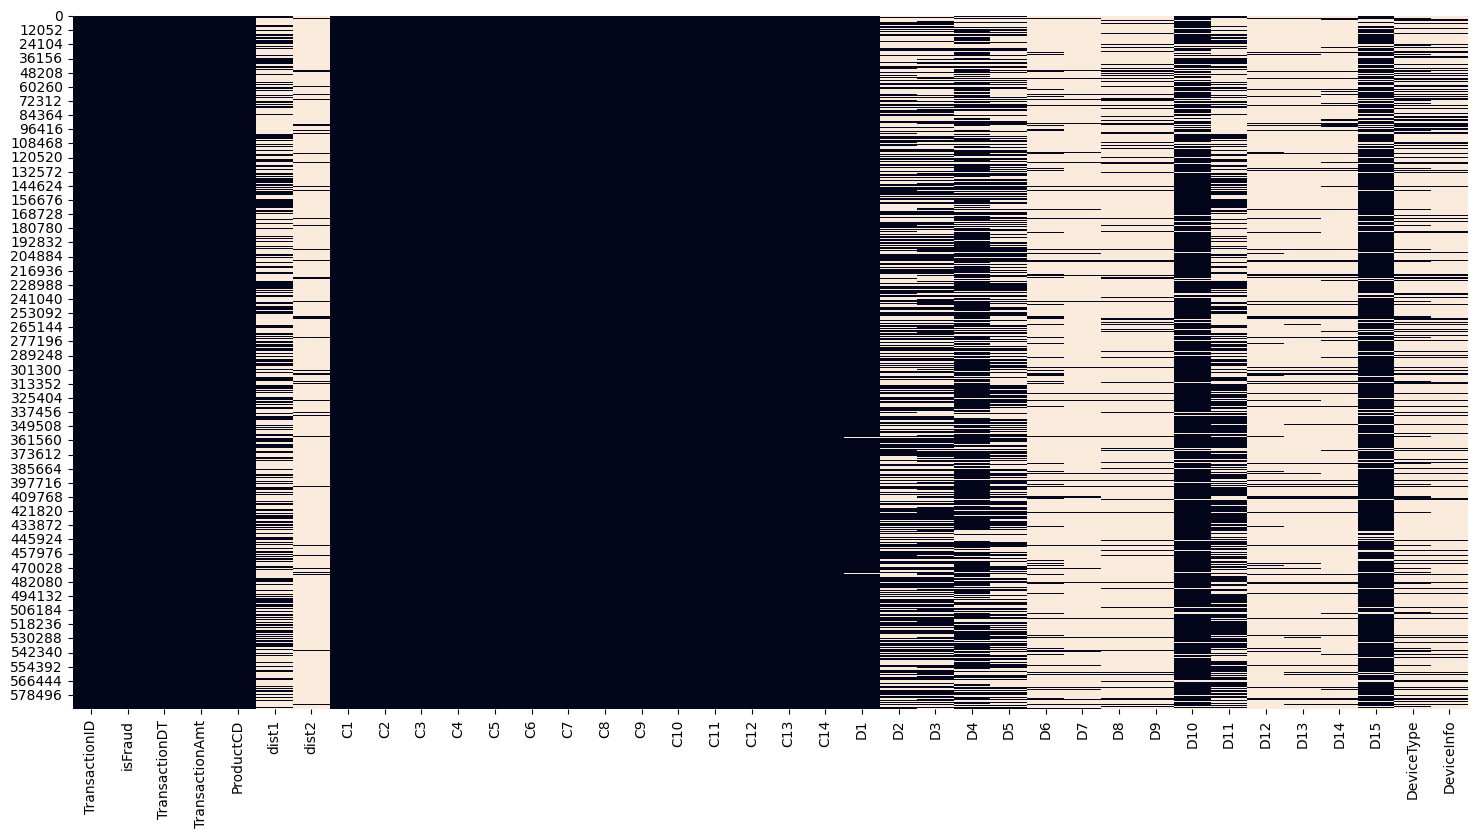

In [123]:
%matplotlib notebook
%matplotlib inline

plt.figure(figsize=(18,9))
train_full_num = train_left_join.filter(regex='isFraud|TransactionDT|TransactionAmt|dist|C|D')
sns.heatmap(train_full_num.isnull(), cbar= False)

<AxesSubplot:>

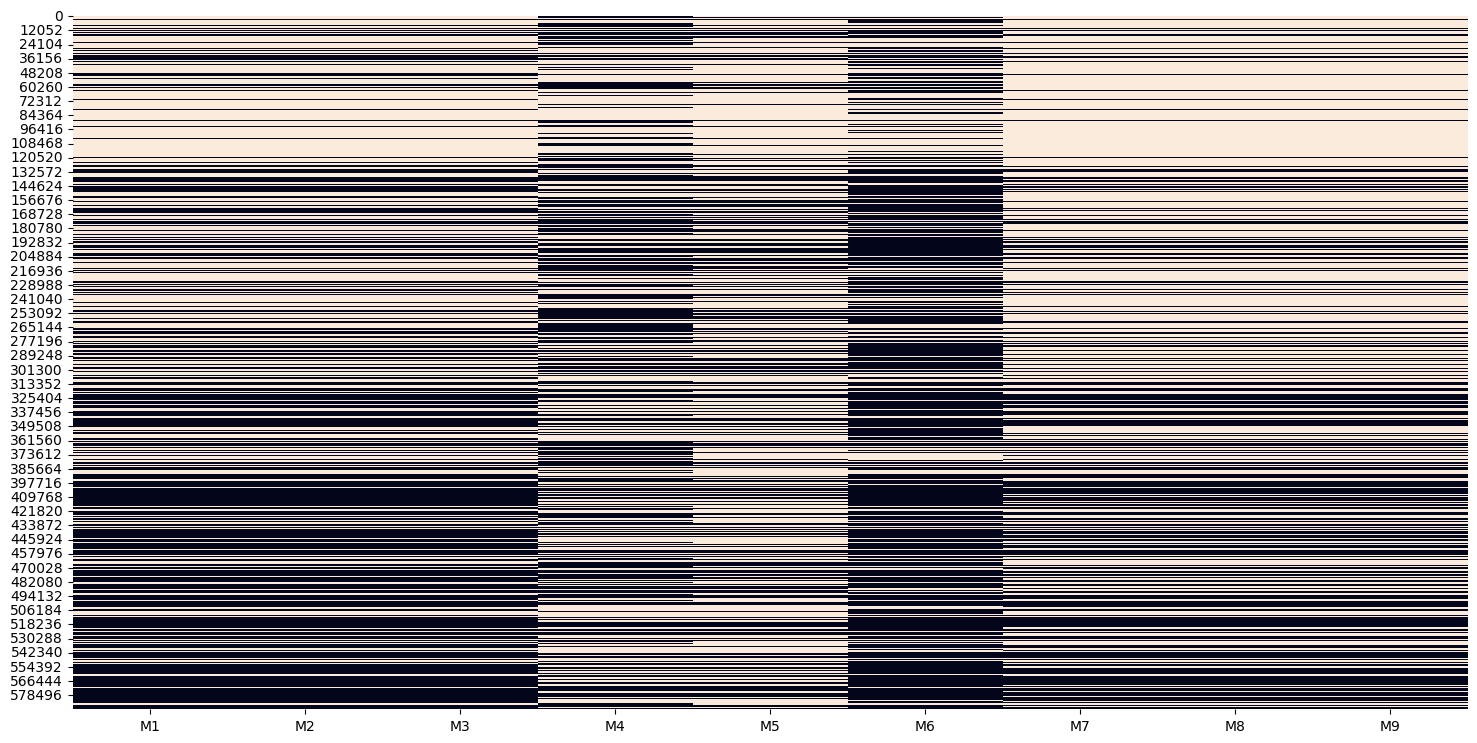

In [127]:
%matplotlib notebook
%matplotlib inline
plt.figure(figsize=(18,9))
train_full_num = train_left_join.filter(regex='M')
sns.heatmap(train_full_num.isnull(), cbar= False)

<AxesSubplot:>

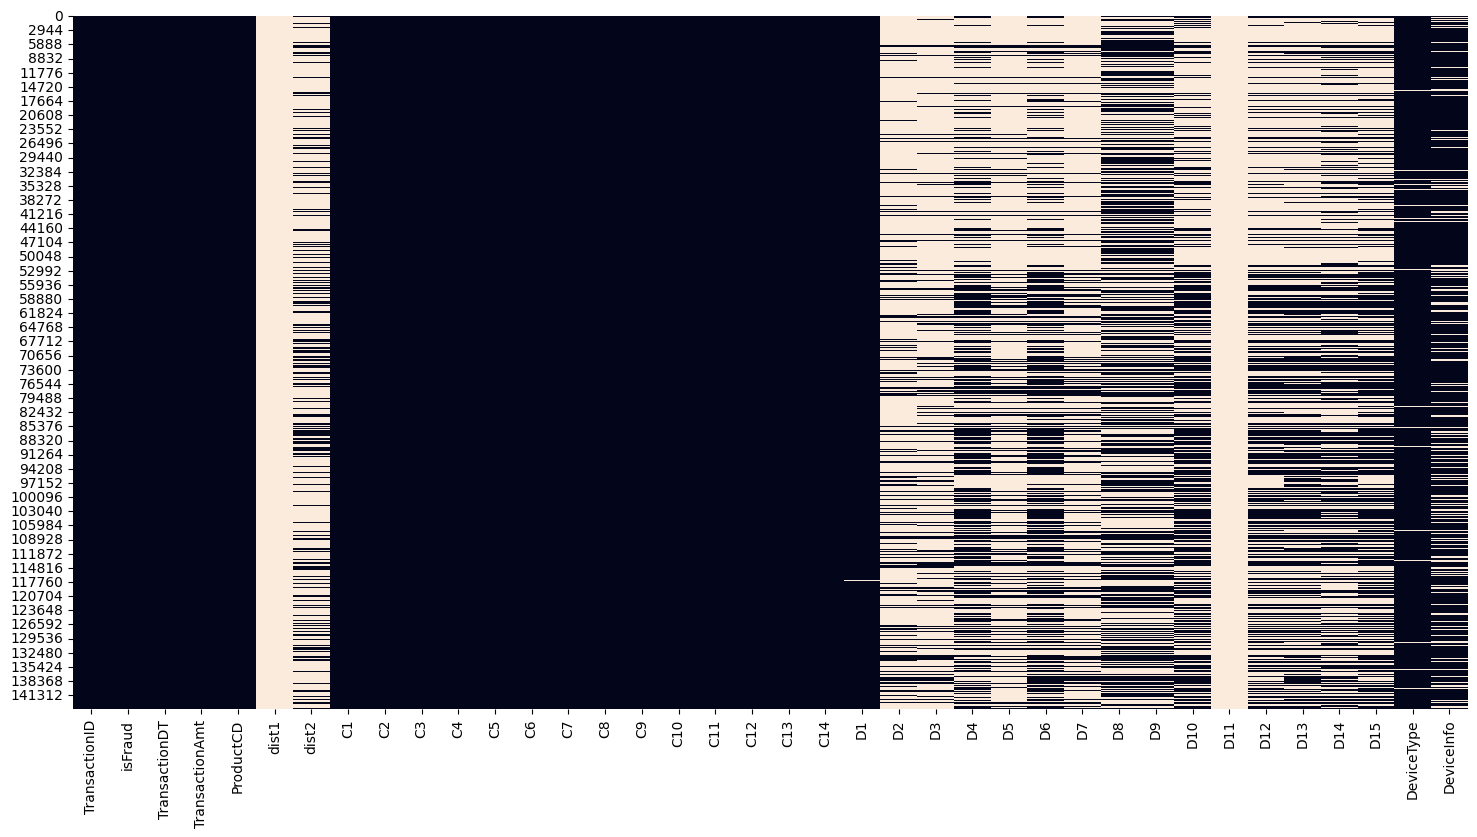

In [125]:
%matplotlib notebook
%matplotlib inline

plt.figure(figsize=(18,9))
train_full_num = train_in_join.filter(regex='isFraud|TransactionDT|TransactionAmt|dist|C|D')
sns.heatmap(train_full_num.isnull(), cbar= False)

<AxesSubplot:>

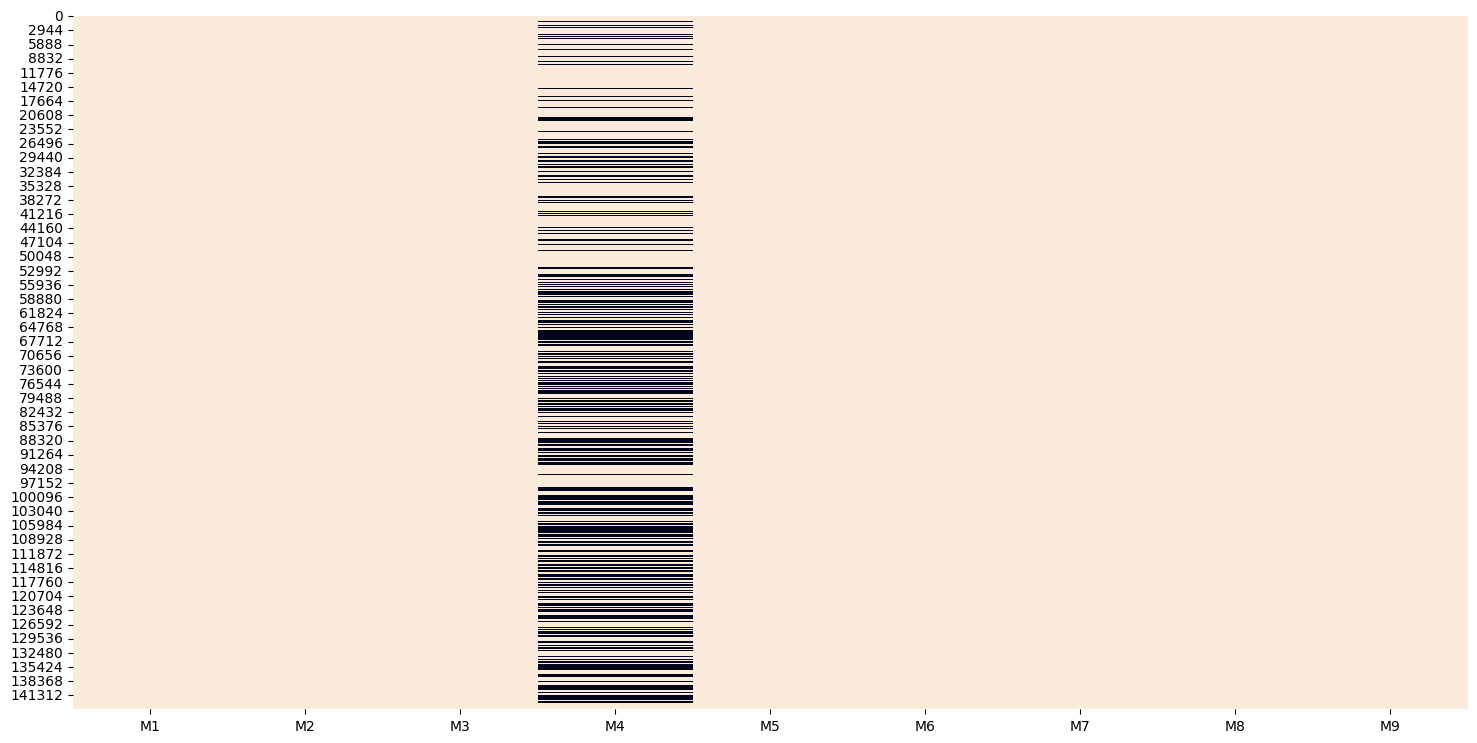

In [126]:
%matplotlib notebook
%matplotlib inline
plt.figure(figsize=(18,9))
train_full_num = train_in_join.filter(regex='M')
sns.heatmap(train_full_num.isnull(), cbar= False)